# **Machine Learning Project: SuperKart**

Google Drive Data set location:
https://drive.google.com/file/d/1c5Rt2hsWCJYFxQ9qklier_7ml5CrxcTf/view

Google Colab Link:
https://colab.research.google.com/drive/1fZP2CL4Fj4jO7bvq-AnmYqzBrVdoa7iT?usp=drive_link

---------------------------
## **Objective:** SuperKart wants to predict the future sales revenue of it's different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly.
----------------------------

SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products.

**They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly.**

 SuperKart has shared the sales records of its various outlets for the previous quarter, and asked to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.

---------------------------------
## **Data Description:**
---------------------------------

**The data contains the different attributes of the various products and stores for the previous quarter**

The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
* Product_Weight - the weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
* Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - the year in which the store was established
* Store_Size - the size of the store depending on sq. feet like high, medium, and low
* Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store
---------------------------------
## **Important notes on Columns:**
---------------------------------
1, Store_Id - The entire dataset is based of off information from only 4 stores BUT SuperKart only has 4 stores total in their chain

2, Store_Id itself will be your strongest predictor for ML. The other store features are redundant since each store has unique characteristics.

3, Timeline of the data is from previous quarter. Eventually the model will need to be trained on multiple quarters, ideally all quarters of past few years.


## **Findings & Conclusions**

---


___________


### **Highest Value Findings and Conclusions:**
___________

Finding # 1
Rural locations are FoodMarts (tier 3)
- meat and seafood are 71 % of niche spending in tier 3.

niche products = data['Starchy Foods', 'Breakfast', 'Meat', 'Seafood']
(niche products were decided on as they are the lowest selling items by % accross all stores)

- These products are also significantly cheaper than at Tier 1 and 2 stores. this means customers are shopping for bulk and value here, not that they are willing to spend more.

If SuperKart is opening a new store in a rural area, it should be a Food Mart. People in rural areas are accustomed to driving, so if they wish to go to a large store in the city they can.
__________
2, Sugar Content Optimization

Regular sugar items sell $29 more per unit than low sugar
But low sugar dominates volume (55% of revenue)
Action: Balance mix - stock low sugar for volume, regular for margins
__________
3, Tier drives pricing strategy.

Store Performance Hierarchy

OUT004 (Medium, Tier 2) = 56% of all sales despite mid-pricing
OUT002 (Small, Tier 3) = lowest performance but essential rural coverage
Action: Replicate OUT004's volume model for expansion
_______
4, Product Strategy - Weight & Price Drive Sales

Weight is THE strongest predictor (coefficient 209 vs MRP at 19)

Every 1kg increase → +$209 revenue
Every $1 MRP increase → +$19 revenue
Action: Prioritize heavier, premium-priced items in inventory mix
___________
5, OUT004's success is volume-based, not format-based
_____________
6, Only 4 stores = can't generalize store characteristics
____________
7, Disclaimer: This can not predict for new store. That was not part of the assignment anyways but to predict for a new store I would need to:

- Collect multi-quarter data before expanding
- Keep Store_Id or store features in the model
- Use tree-based model (handles multicollinearity)
- Then input: "Rural + Food Mart + Small" → model predicts sales
even then it's still difficult to predict because they only have 4 stores. conclusions for a new store would likely be basic like; plant foodmarts in rural areas
  

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### **Importing the Dataset**

 the data is here in my portfolio: https://drive.google.com/file/d/1c5Rt2hsWCJYFxQ9qklier_7ml5CrxcTf/view
 just download it


In [ ]:
# After downloading, upload the file using the button below
from google.colab import files
uploaded = files.upload()

# Read the data
kart = pd.read_csv('Copy of SuperKart.csv')

In [ ]:
# Copying data to another variable to avoid any changes to original data
data = kart.copy()

### **View the first and last 5 rows of the dataset**

In [ ]:
data.head(5)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
data.head(-5)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36
...,...,...,...,...,...,...,...,...,...,...,...,...
8753,FD4001,12.71,Low Sugar,0.039,Fruits and Vegetables,154.18,OUT004,2009,Medium,Tier 2,Supermarket Type2,3611.62
8754,FD598,7.26,Low Sugar,0.054,Fruits and Vegetables,128.93,OUT002,1998,Small,Tier 3,Food Mart,1175.03
8755,FD5840,14.46,Low Sugar,0.030,Baking Goods,156.51,OUT001,1987,High,Tier 2,Supermarket Type1,4056.67
8756,FD6212,11.15,Low Sugar,0.096,Fruits and Vegetables,156.00,OUT004,2009,Medium,Tier 2,Supermarket Type2,3297.99


### **Understand the shape of the dataset**

In [ ]:
data.shape

(8763, 12)

### **Check the data types of the columns for the dataset**

In [ ]:
data.dtypes

,0
Product_Id,object
Product_Weight,float64
Product_Sugar_Content,object
Product_Allocated_Area,float64
Product_Type,object
Product_MRP,float64
Store_Id,object
Store_Establishment_Year,int64
Store_Size,object
Store_Location_City_Type,object


### **Checking for missing values in the dataset** ###

In [ ]:
data.isnull().sum()

,0
Product_Id,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_Type,0
Product_MRP,0
Store_Id,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0


**Observations: no nulls


In [ ]:
# Check for duplicate values
for column in data.columns:
    duplicate_count = data[column].duplicated().sum()
    if duplicate_count > 0:
      print(f"Column '{column}' has {duplicate_count} duplicate values")

Column 'Product_Weight' has 7650 duplicate values
Column 'Product_Sugar_Content' has 8759 duplicate values
Column 'Product_Allocated_Area' has 8535 duplicate values
Column 'Product_Type' has 8747 duplicate values
Column 'Product_MRP' has 2663 duplicate values
Column 'Store_Id' has 8759 duplicate values
Column 'Store_Establishment_Year' has 8759 duplicate values
Column 'Store_Size' has 8760 duplicate values
Column 'Store_Location_City_Type' has 8760 duplicate values
Column 'Store_Type' has 8759 duplicate values
Column 'Product_Store_Sales_Total' has 95 duplicate values


most not a problem but need to check store id duplicates for each product id


In [ ]:
# Finds rows where the same product appears in the same store more than once
product_store_conflicts = data.duplicated(subset=['Product_Id', 'Store_Id']).sum()

print(f"Conflicts found: {product_store_conflicts}")

Conflicts found: 0


## **Exploratory Data Analysis**

#### Let's check the statistical summary of the data

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD306,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f"unique store ids:", data['Store_Id'].nunique())
print(f"store id value counts:", data['Store_Id'].value_counts())

unique store ids: 4
store id value counts: Store_Id
OUT004    4676
OUT001    1586
OUT003    1349
OUT002    1152
Name: count, dtype: int64


#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Product_Id
FD306     1
FD6114    1
FD7839    1
FD5075    1
FD8233    1
         ..
FD1387    1
FD1231    1
FD5276    1
FD8553    1
FD6027    1
Name: count, Length: 8763, dtype: int64
--------------------------------------------------
Product_Sugar_Content
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: count, dtype: int64
--------------------------------------------------
Product_Type
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: count, dtype: int64
--------------------------------------------------
Store_Id
OUT004    4676
O

**Observations:consilidate sugar content categories**

In [ ]:
# Replacing reg category with Regular in Product_Sugar_Content feature

data.Product_Sugar_Content.replace(to_replace = ["reg"], value = ["Regular"], inplace = True)

In [ ]:
# Value counts for each class in Product_Sugar_Content feature
data['Product_Sugar_Content'].value_counts()

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2359
No Sugar,1519


In [ ]:
print(data['Product_Id'])

0       FD6114
1       FD7839
2       FD5075
3       FD8233
4       NC1180
         ...  
8758    NC7546
8759     NC584
8760    NC2471
8761    NC7187
8762     FD306
Name: Product_Id, Length: 8763, dtype: object


In [ ]:
# Extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]

data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


In [ ]:
data["Product_Id_char"].unique() # Fill the blank to get all unique elements in Product_Id_char

array(['FD', 'NC', 'DR'], dtype=object)

In [ ]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique()

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

Product_Id_Char FD = 'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
      'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'

In [ ]:
data.loc[data.Product_Id_char == "DR", "Product_Type"].unique()

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

Product_Id_Char DR = ['Hard Drinks', 'Soft Drinks']


In [ ]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique()

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

Product_Id_Char NC = 'Health and Hygiene', 'Household', 'Others'

#### The Product_Id column will not add any value to our analysis so let's drop it before we move forward

In [ ]:
data.drop('Product_Id', inplace=True, axis=1)


In [ ]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


## **Univariate Analysis**

In [ ]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):

    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

**Product_Weight**

12.653792080337787


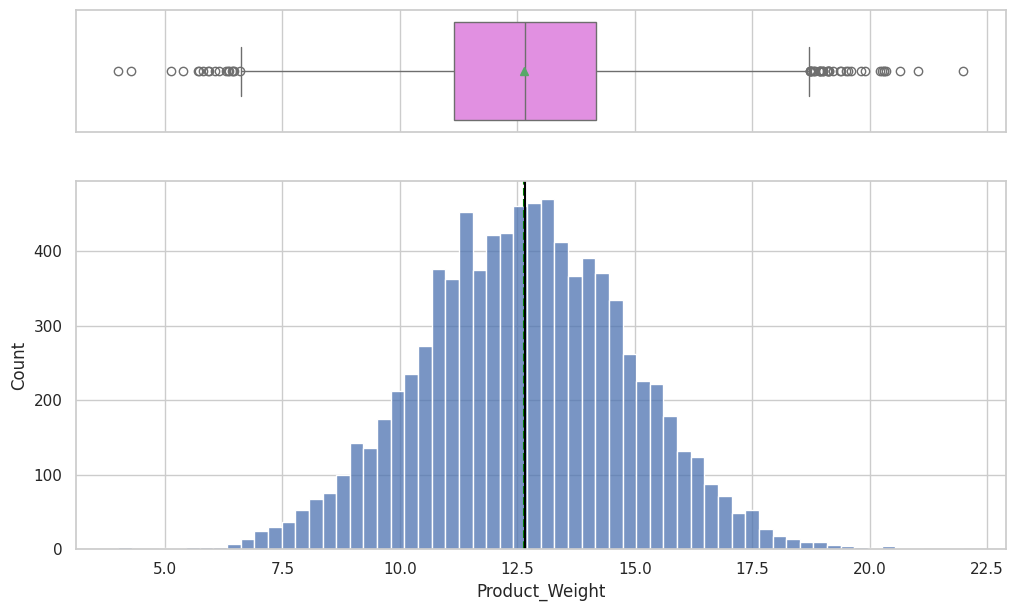

In [ ]:
histogram_boxplot(data, "Product_Weight")
print(data['Product_Weight'].mean())

**Observations:
Outliers: There are visible outliers on both ends of the spectrum, indicated by the open circles in the box plot. Weights as low as ~4.0 and as high as ~22.0 exist, though they are statistically rare.


central tendancy 12.6-12.7.
mean and median are very close.
normal distribution (10-15).
IQR 11.2-14.1**

**Product_Allocated_Area**

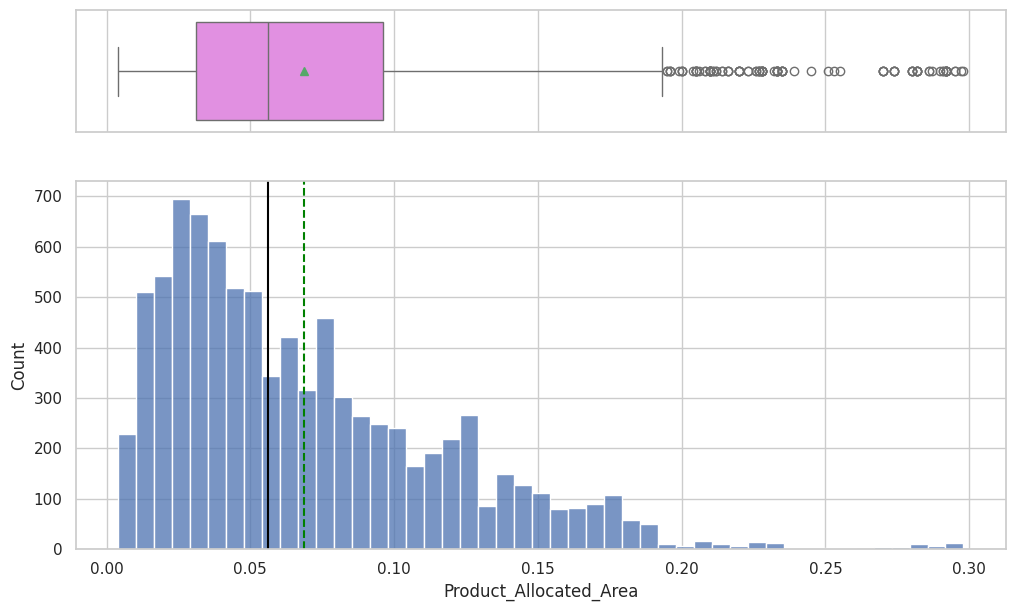

In [ ]:
histogram_boxplot(data, "Product_Allocated_Area")

**Observations:

Outliers: There are visible outliers on both ends of the spectrum, indicated by the open circles in the box plot. Weights as low as ~4.0 and as high as ~22.0 exist, though they are statistically rare.


centered around weight of 12.65

mean and median close

normal dist

iqr = 11.2 -14.1

**


**Product_MRP**

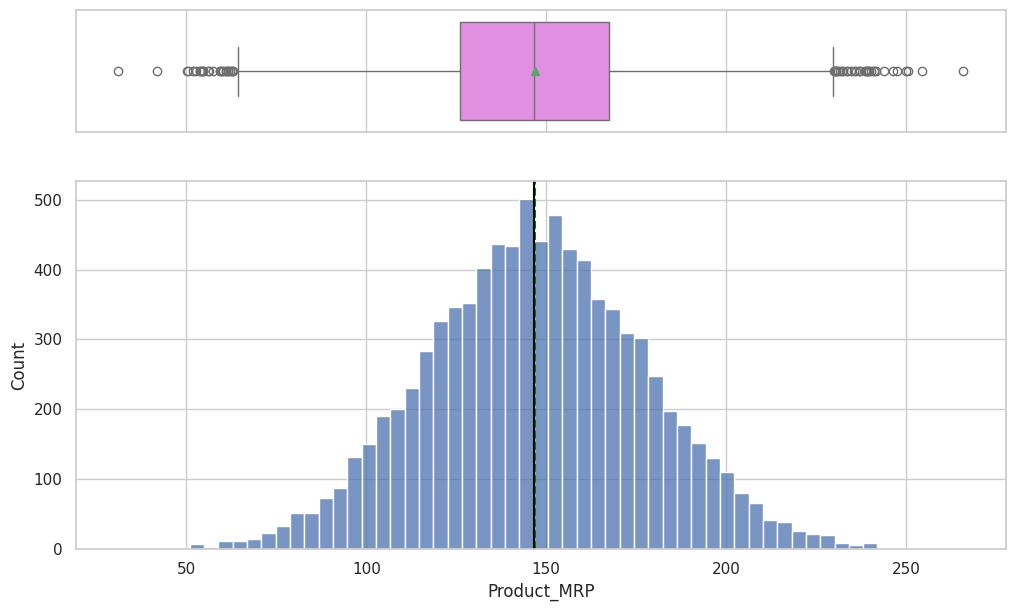

In [ ]:
# Plot the histogram and the boxplot for 'Product_MRP'
histogram_boxplot(data, "Product_MRP")

**Observation:

Spread: Most products are priced between 100 and 200. (IQR) shows the middle 50% of products fall roughly between 125 and 185.

Outliers: There are a few rare outliers at the extreme low end (below 50) and high end (above 250).**

**Product_Store_Sales_Total**

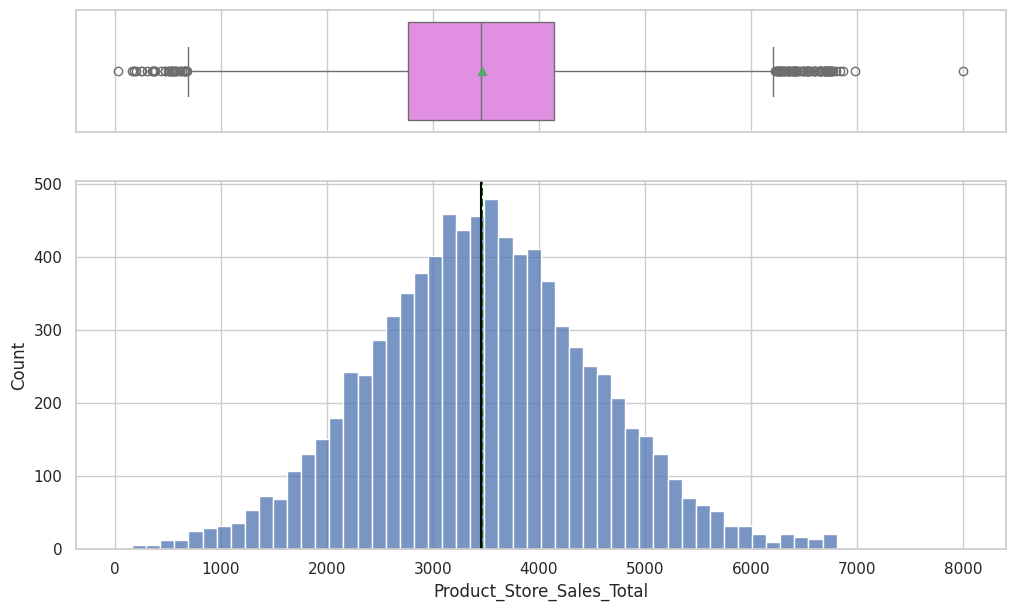

In [ ]:
# Plot the histogram and the boxplot for 'Product_Store_Sales_Total'
histogram_boxplot(data, "Product_Store_Sales_Total")

Observations:

This data follows a Normal Distribution, but it is "wider" than price data, indicating more variety in how much money each product actually generates.

Central Tendency: The mean and median are very closely aligned at approximately 3,500.

Symmetry: The distribution is quite symmetrical, showing that sales performance for most items stays within a standard range without extreme skewing.

(IQR): The middle 50% of your products generate between roughly 2,700 and 4,200 in total sales.

Outliers: There are several low-performing outliers (below 500) and high-performing "superstars" (one reaching nearly 8,000).

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

**Product_Sugar_Content**

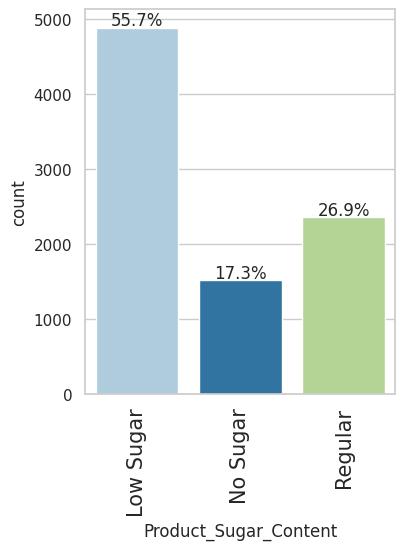

In [ ]:
labeled_barplot(data, "Product_Sugar_Content", perc = True) # Plot for Product_Sugar_Content


**Product_Type**

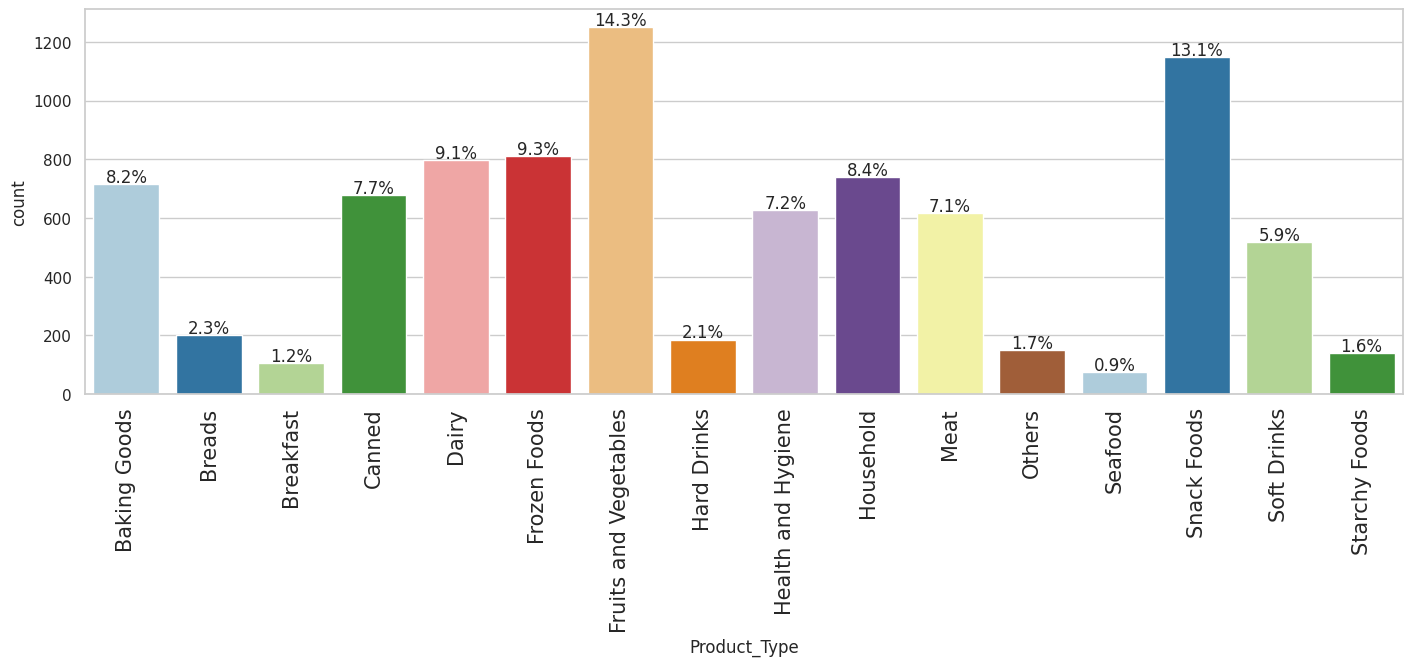

In [ ]:
labeled_barplot(data, 'Product_Type', perc = True) # Plot the labelled barplot for 'Product_Type'

**Observations:

tier one, highesr selling; fruits and vegegetables, snack foods

tier two are; dairy, frozen, baking goods, canned, household.

* top five categories (Fruits/Vegetables, Snack Foods, Frozen Foods, Dairy, and Canned) make up over 53% of total item count. *

tier three slightly under two; meat, health and hygiene, soft drinks

tier four; breads, breakfast, hard drinks, seafood, others, starchy foods.
**

SuperKart probably does not focus on health or health/hygiene sales. Breakfast and seafood may be niche.

Comparing starchy foods, breakfast, meat, seafood between store tiers.


In [ ]:
target_categories = ['Starchy Foods', 'Breakfast', 'Meat', 'Seafood']
niche_df = data[data['Product_Type'].isin(target_categories)]
sales_percentage = niche_df.groupby(['Store_Location_City_Type', 'Product_Type'])['Product_Store_Sales_Total'].sum()
sales_percentage = sales_percentage.groupby(level=0, group_keys=False).apply(lambda x: 100 * x / x.sum())
print(sales_percentage)

Store_Location_City_Type  Product_Type 
Tier 1                    Breakfast        11.585692
                          Meat             63.109792
                          Seafood           7.915379
                          Starchy Foods    17.389137
Tier 2                    Breakfast        10.832540
                          Meat             64.900363
                          Seafood           8.439802
                          Starchy Foods    15.827295
Tier 3                    Breakfast        10.989015
                          Meat             71.299598
                          Seafood           8.296375
                          Starchy Foods     9.415013
Name: Product_Store_Sales_Total, dtype: float64


## KEY Observation 1


### KEY OBSERVATION 1 summary



Niche group sales by Tier

Tier 1 (%) - Staples
---------

Meat - 63.11  

Starchy Foods - 17.39

Breakfast - 11.59

Seafood - 7.92

Tier 2 (%)
----------
Meat - 64.90

Starchy Foods - 15.83

Breakfast - 10.83

Seafood - 8.44

Tier 3 (%) - Meat King
----------
Meat - 71.30

Starchy Foods - 9.42

Breakfast - 10.99

Seafood - 8.30


1. tier 1 & 2 sell more starchy food than 3
2. all sell similar on breakfast and seafood
3. tier 3 sells more meat than 1 and 2
4. tier 3 sells HALF the amount of starchy food as tier 1

Why?

Demographics and Store location (income) ?
- check if Tier 3 has a higher MRP for seafood and meat

More meat selection at tier 3?

Related to right skew in Tier 3 Product_Allocated_Area?

Customer Habits per location?

In [ ]:
# Tier 3 premium and MRP
# Filter for your premium protein categories
target_categories = ['Meat', 'Seafood']
mrp_df = data[data['Product_Type'].isin(target_categories)]

# Calculate the mean MRP for each tier and product type
mrp_comparison = mrp_df.groupby(['Store_Location_City_Type', 'Product_Type'])['Product_MRP'].mean()

# Unstack to create a side-by-side comparison table
print("Average Product_MRP (CAD) by Tier:")
print(mrp_comparison.unstack().round(2))

Average Product_MRP (CAD) by Tier:
Product_Type                Meat  Seafood
Store_Location_City_Type                 
Tier 1                    178.78   191.35
Tier 2                    147.18   148.25
Tier 3                    108.20    91.69


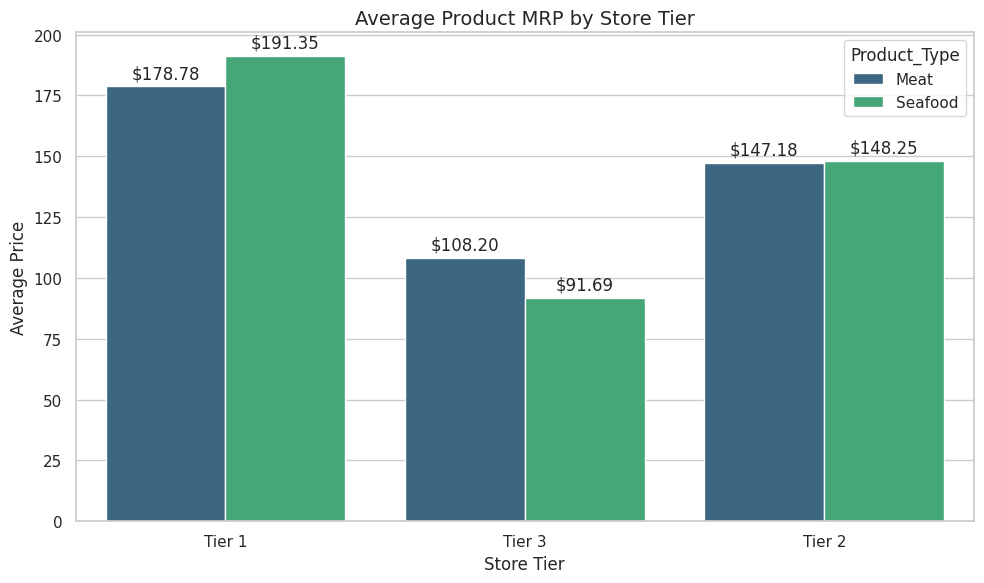

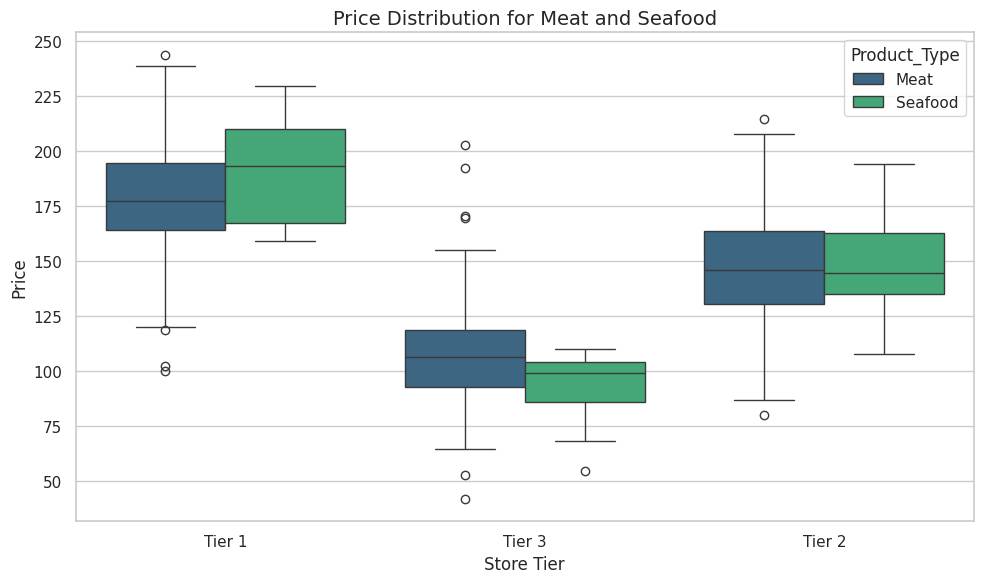

In [ ]:
# Filter for the target protein categories
target_categories = ['Meat', 'Seafood']
premium_df = data[data['Product_Type'].isin(target_categories)]

# 1. Bar Chart: Comparing Average Prices (MRP)
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

ax1 = sns.barplot(
    data=premium_df,
    x='Store_Location_City_Type',
    y='Product_MRP',
    hue='Product_Type',
    palette='viridis',
    errorbar=None
)

plt.title('Average Product MRP by Store Tier', fontsize=14)
plt.ylabel('Average Price')
plt.xlabel('Store Tier')

# Add currency labels to the bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='$%.2f', padding=3)

plt.tight_layout()
plt.show()

# 2. Boxplot: Comparing Price Distributions and Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=premium_df,
    x='Store_Location_City_Type',
    y='Product_MRP',
    hue='Product_Type',
    palette='viridis'
)

plt.title('Price Distribution for Meat and Seafood', fontsize=14)
plt.ylabel('Price')
plt.xlabel('Store Tier')
plt.tight_layout()
plt.show()

so in tier 3, meat and seafood are 71 % of niche spending and also significantly cheaper than 1 and 2. this means customers are shopping for bulk and value, not that they are willing to spend more.

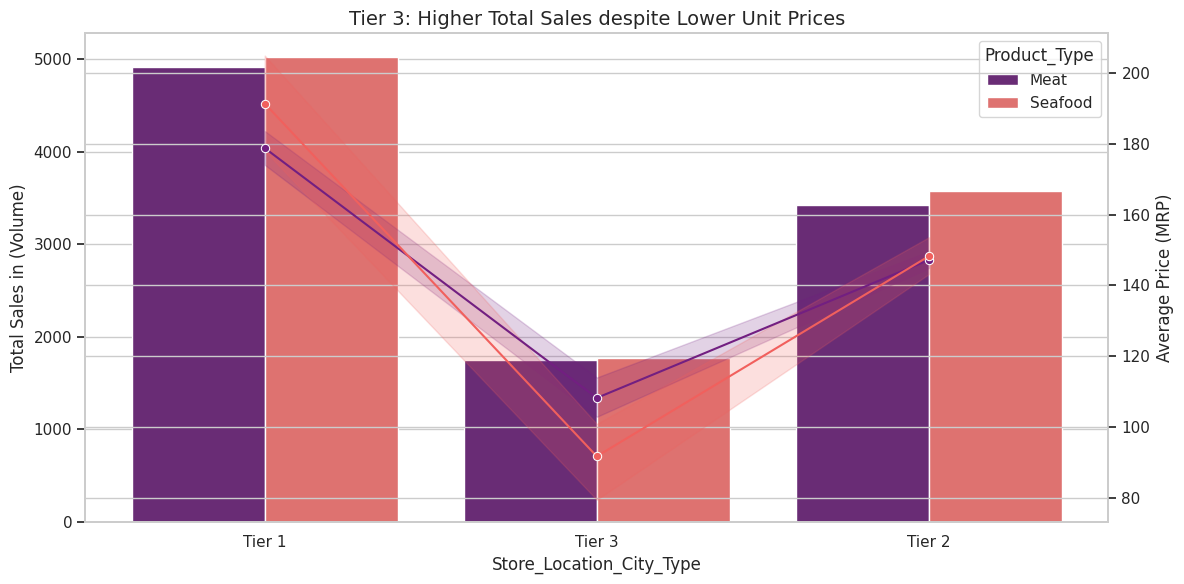

In [ ]:
# Checking Bulk Effect


# Filter for the target protein categories
target_categories = ['Meat', 'Seafood']
premium_df = data[data['Product_Type'].isin(target_categories)]

# Chart: Total Sales vs Average Price to show the "Volume" gap
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Sales (Volume)
sns.barplot(data=premium_df, x='Store_Location_City_Type', y='Product_Store_Sales_Total',
            hue='Product_Type', ax=ax1, palette='magma', errorbar=None)
ax1.set_ylabel('Total Sales in (Volume)')
ax1.set_title('Tier 3: Higher Total Sales despite Lower Unit Prices', fontsize=14)

# Plot Mean MRP as a line to show it dropping in Tier 3
ax2 = ax1.twinx()
sns.lineplot(data=premium_df, x='Store_Location_City_Type', y='Product_MRP',
             hue='Product_Type', ax=ax2, marker='o', legend=False, palette='magma')
ax2.set_ylabel('Average Price (MRP)')

plt.tight_layout()
plt.show()

Observation: unit prices for Meat and Seafood are lower in Tier 3, but the total revenue remains high, the primary driver is clearly volume. This is a classic "High Volume, Low Margin" retail scenario.

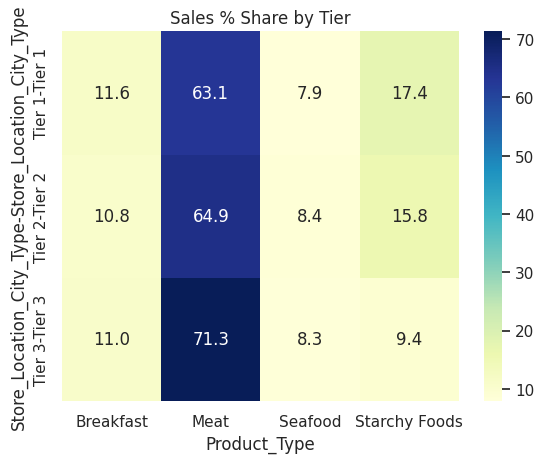

In [ ]:
# Weight vs total sales
heatmap_data = niche_df.groupby(['Store_Location_City_Type', 'Product_Type'])['Product_Store_Sales_Total'].sum()
heatmap_data = heatmap_data.groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack()

# Plotting
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Sales % Share by Tier')
plt.savefig('niche_heatmap.png')

more confirmation that its not pricing complexity and highlights that Tier 3's are primary "Protein Hubs."

**Store_Id**

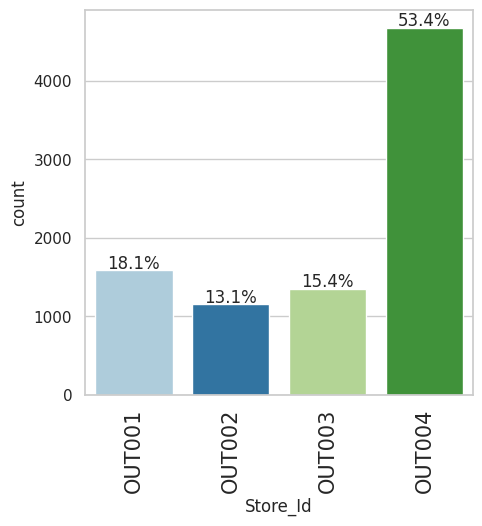

In [ ]:
labeled_barplot(data, 'Store_Id', perc = True)

**Observations:__**

**Store_Size**

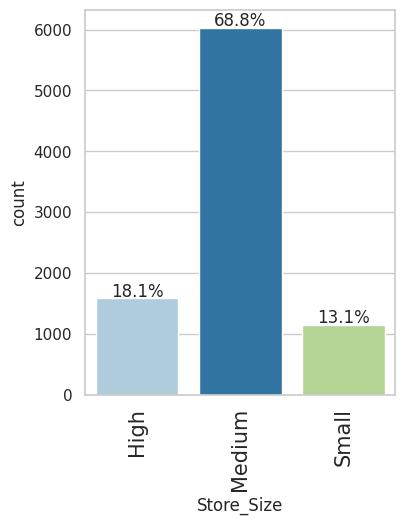

In [ ]:
labeled_barplot(data, 'Store_Size', perc = True) # Plot the labelled barplot for 'Store_Size'

**Observations:comparing size to city type**

Store_Size                High  Medium  Small
Store_Location_City_Type                     
Tier 1                       0    1349      0
Tier 2                    1586    4676      0
Tier 3                       0       0   1152


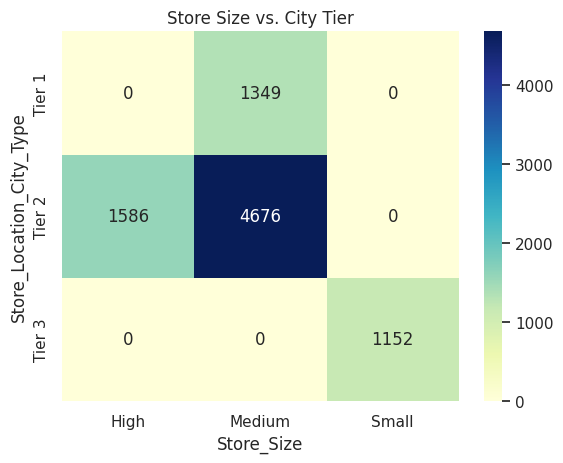

In [ ]:
print(pd.crosstab(data['Store_Location_City_Type'], data['Store_Size']))

# 2. Simple Heatmap: Best for identifying the overlap visually
ct = pd.crosstab(data['Store_Location_City_Type'], data['Store_Size'])
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Store Size vs. City Tier')
plt.savefig('size_tier_correlation.png')

KEY OBSERVATION
tier 3 is only small stores
does this indicate rural habits to buy more meat?




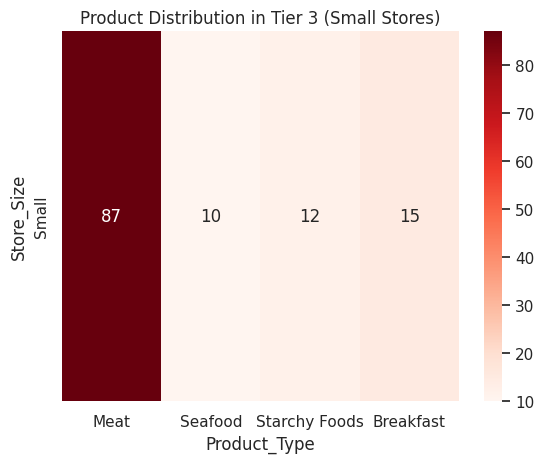

In [ ]:
# Are the smaller stores all in rural demographics?

# Create a heatmap of Store Size vs Category for Tier 3 only
tier3_data = data[data['Store_Location_City_Type'] == 'Tier 3']
rural_meat = pd.crosstab(tier3_data['Store_Size'], tier3_data['Product_Type'])

sns.heatmap(rural_meat[['Meat', 'Seafood', 'Starchy Foods', 'Breakfast']],
            annot=True, fmt='d', cmap='Reds')
plt.title('Product Distribution in Tier 3 (Small Stores)')
plt.show()

**Store_Location_City_Type**

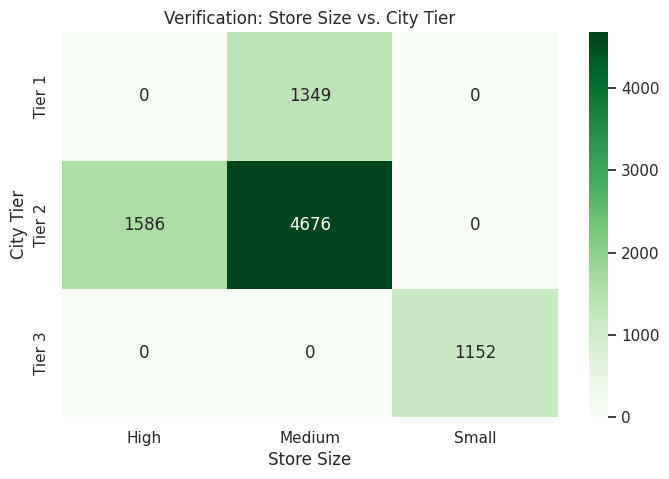

Store_Size                High  Medium  Small
Store_Location_City_Type                     
Tier 1                       0    1349      0
Tier 2                    1586    4676      0
Tier 3                       0       0   1152


In [ ]:
# Create a frequency table (Crosstab) to see the count of stores
size_tier_check = pd.crosstab(data['Store_Location_City_Type'], data['Store_Size'])

# Visualize it with a simple heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(size_tier_check, annot=True, fmt='d', cmap='Greens')
plt.title('Verification: Store Size vs. City Tier')
plt.xlabel('Store Size')
plt.ylabel('City Tier')
plt.show()

# Print the numerical table for exact verification
print(size_tier_check)

KEY OBSERVATION VERIFIED

Tier 3 is comprised entirely of small-format stores.
All Tier 3s are Store_type = FoodMart

Bivariare Analysys

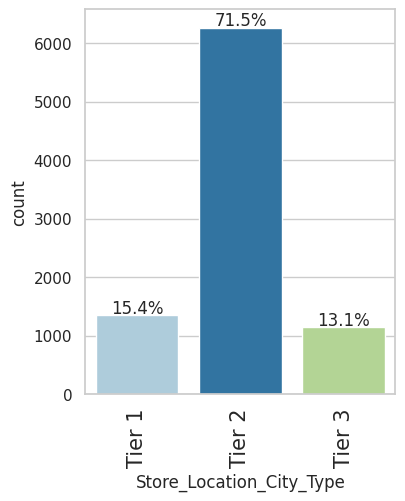

In [ ]:
labeled_barplot(data, 'Store_Location_City_Type', perc = True) # Plot the labelled barplot for 'Store_Locatiom_City_Type'

KEY OBSERVATION:
Tier 2 is backbone / primary market for company
tier 3 is niche


**Store_Type**

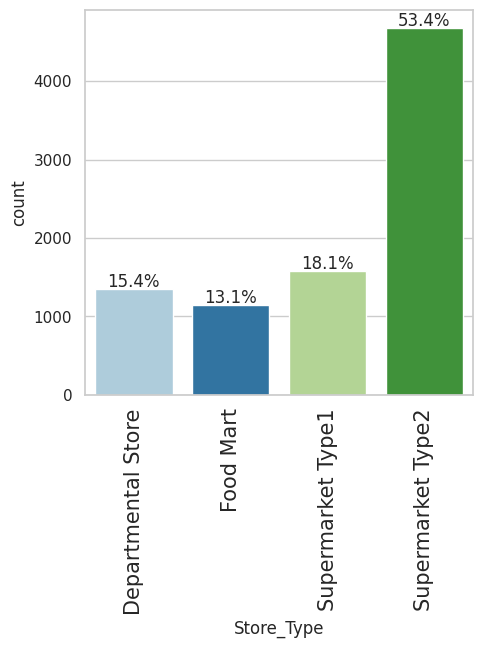

In [ ]:
labeled_barplot(data, 'Store_Type', perc = True) # Plot the labelled barplot for 'Store_Type'

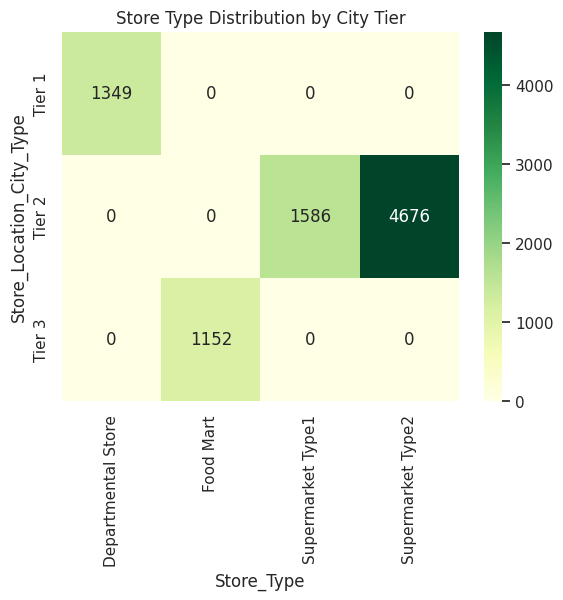

In [ ]:
# Store types accross tiers

type_tier_pivot = pd.crosstab(data['Store_Location_City_Type'], data['Store_Type'])

# Visual heatmap to see the concentration
sns.heatmap(type_tier_pivot, annot=True, fmt='d', cmap='YlGn')
plt.title('Store Type Distribution by City Tier')
plt.show()

KEY OBSERVATIONS

All Tier 1 are Departmental store
____________
Tier 2 are comprised of

25% Supermarket Type 1 (1586)

74% Supermarket Type 2 (4676)
__________
All Tier 3 are Food Mart (1152)


## **Bivariate Analysis continued**

### overall correlation check

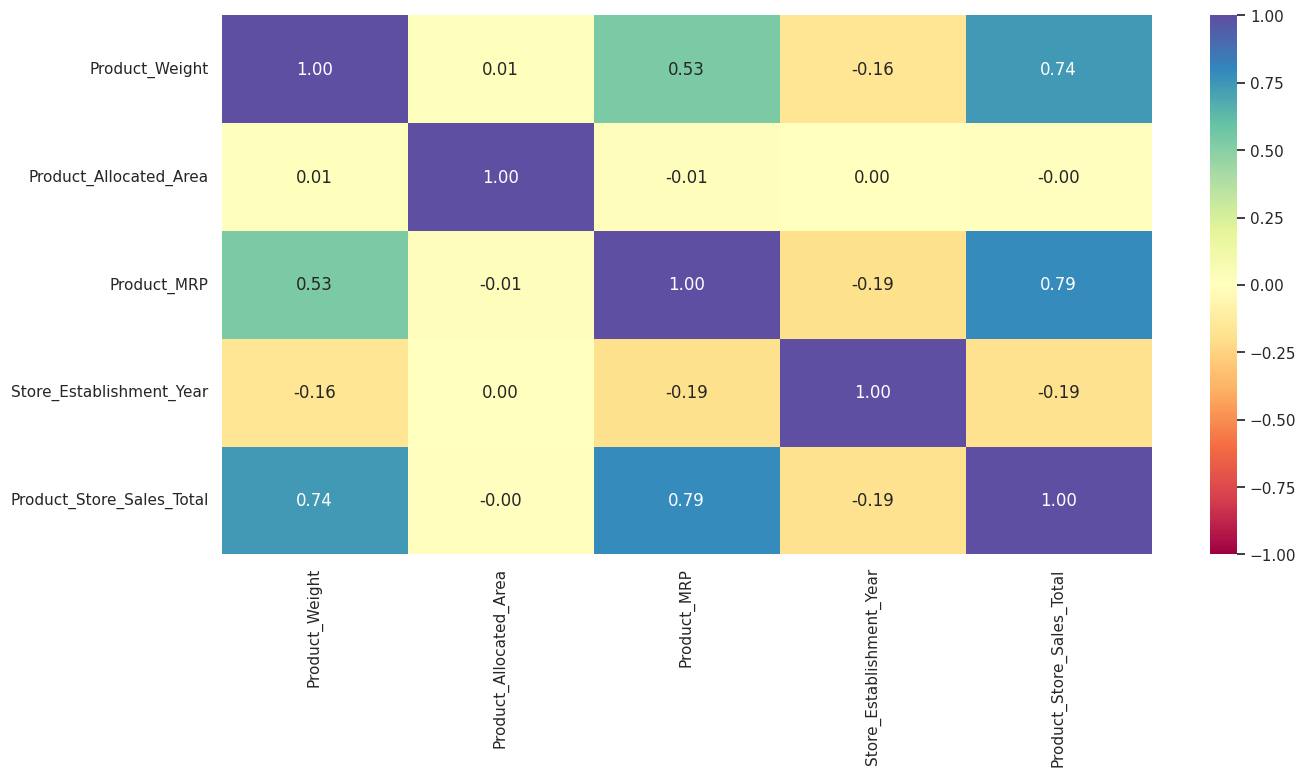

In [ ]:
# Correlation check
cols_list = data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(
    data[cols_list].corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

KEY Observations:

Product store sales total : MRP = 79% - (79% of the total stores sales come from products being sold at or near their maximum retail price)

Product store slaes total : weight = 74% (heavier items account for 74% of sales)

Product Weight : MRP = 53% (heavier products are more expensive)

assumption : Meat is high in both weight and mrp
checking in next cell


### Quick check on heavy items



In [ ]:
# Top 5 heaviest products
heaviest = data.nlargest(5, 'Product_Weight')[['Product_Type', 'Product_Weight', 'Product_Store_Sales_Total', 'Product_MRP']]
print(heaviest)

       Product_Type  Product_Weight  Product_Store_Sales_Total  Product_MRP
4356      Household           22.00                    8000.00       266.00
231   Starchy Foods           21.04                    5591.41       158.86
8060          Dairy           20.65                    6835.81       223.98
701     Snack Foods           20.35                    5387.26       156.56
6844    Snack Foods           20.31                    6075.11       190.63


In [ ]:
# Why isnt meat in heaviest?
print(data[data['Product_Type'] == 'Meat']['Product_Weight'].describe())

count    618.000000
mean      12.611974
std        2.338276
min        6.770000
25%       11.070000
50%       12.590000
75%       14.330000
max       19.130000
Name: Product_Weight, dtype: float64


### Focusing on MRP

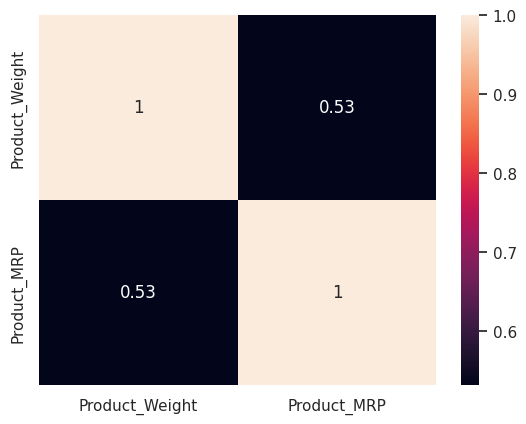

In [ ]:
Weight_MRP_item_heatmap = sns.heatmap(data[['Product_Weight', 'Product_MRP']].corr(), annot=True)
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(data,
                 x='Product_Weight',
                 y='Product_MRP',
                 hover_data=['Product_Id_char'],
                 title='Product Weight vs MRP Distribution',
                 color='Product_MRP',
                 size='Product_Weight') # Optional: bigger dots for heavier items
fig.show()

this shows a linear increase between weight and mrp, but we knew that


In [ ]:
data.head(1)

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.4,FD


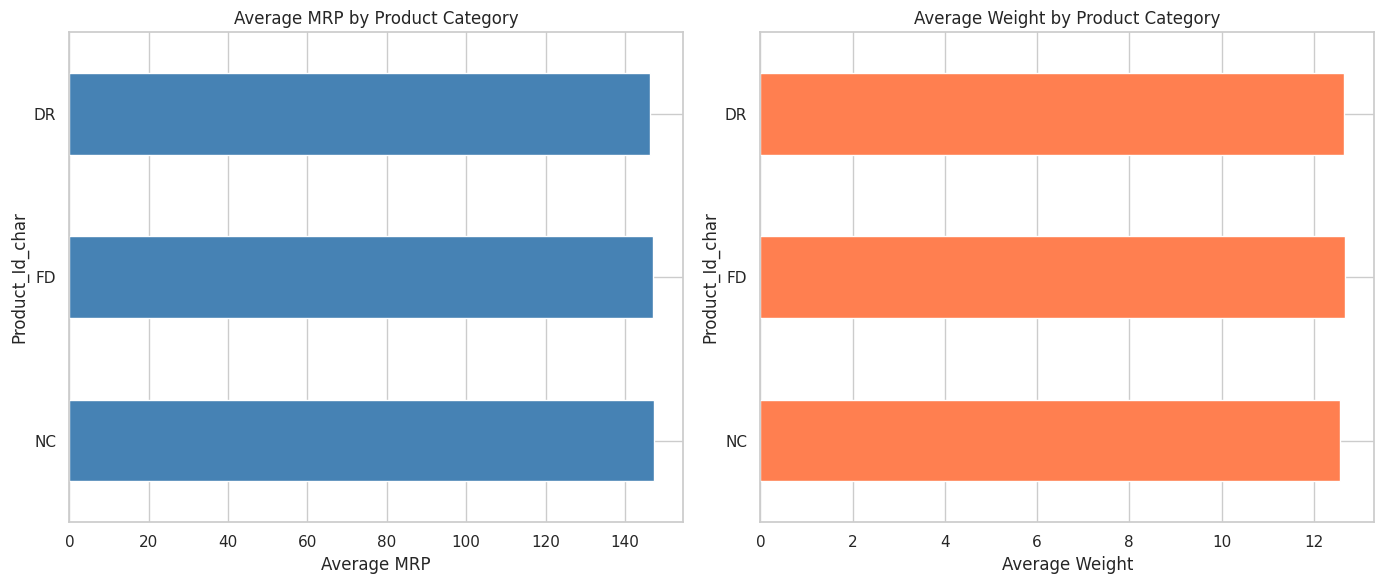

mean values:
                  Product_Weight  Product_MRP
Product_Id_char                             
NC                    12.569447   147.287972
FD                    12.672666   147.061652
DR                    12.660468   146.212156


In [ ]:
product_mrpandweight_summary = data.groupby('Product_Id_char')[['Product_Weight', 'Product_MRP']].mean().sort_values('Product_MRP', ascending= False)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# MRP by category
product_mrpandweight_summary['Product_MRP'].plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_xlabel('Average MRP')
ax1.set_title('Average MRP by Product Category')

# Weight by category
product_mrpandweight_summary['Product_Weight'].plot(kind='barh', ax=ax2, color='coral')
ax2.set_xlabel('Average Weight')
ax2.set_title('Average Weight by Product Category')

plt.tight_layout()
plt.show()

# Print top 5
print(f"mean values:\n",  product_mrpandweight_summary.head())


In [ ]:
# See min, max, and std deviation
product_stats = data.groupby('Product_Id_char')[['Product_Weight', 'Product_MRP']].agg(['mean', 'min', 'max', 'std'])
print(product_stats.sort_values(('Product_MRP', 'max'), ascending=False).head(10))

                Product_Weight                        Product_MRP         \
                          mean   min    max       std        mean    min   
Product_Id_char                                                            
NC                   12.569447  6.80  22.00  2.113489  147.287972  31.00   
FD                   12.672666  4.00  21.04  2.247781  147.061652  41.84   
DR                   12.660468  6.35  19.14  2.149014  146.212156  54.23   

                                    
                    max        std  
Product_Id_char                     
NC               266.00  31.260749  
FD               254.34  30.544291  
DR               231.07  30.878630  


Product_Id_char are very similar probably because groupings are too big for this type of analysys


In [ ]:
# See group by Product_Type min, max, and std deviation
# Split into two separate tables
weight_stats = data.groupby('Product_Type')['Product_Weight'].agg(['mean', 'min', 'max', 'std']).sort_values('max', ascending=False)
mrp_stats = data.groupby('Product_Type')['Product_MRP'].agg(['mean', 'min', 'max', 'std']).sort_values('max', ascending=False)

print("WEIGHT STATS:")
print(weight_stats)
print("\nMRP STATS:")
print(mrp_stats)


WEIGHT STATS:
                            mean   min    max       std
Product_Type                                           
Household              12.607122  6.89  22.00  2.064833
Starchy Foods          13.109220  5.91  21.04  2.323827
Dairy                  12.820163  4.28  20.65  2.302045
Snack Foods            12.707772  4.00  20.35  2.275435
Baking Goods           12.692584  6.64  20.22  2.175548
Canned                 12.474165  5.13  19.82  2.295323
Frozen Foods           12.665882  6.37  19.40  2.237972
Hard Drinks            12.611452  6.35  19.14  2.193049
Meat                   12.611974  6.77  19.13  2.338276
Fruits and Vegetables  12.569992  5.72  19.09  2.166658
Soft Drinks            12.678035  7.16  18.94  2.134881
Others                 12.861921  6.96  18.92  2.220431
Health and Hygiene     12.454729  6.80  18.80  2.138776
Breads                 12.886250  7.00  18.54  2.194953
Seafood                12.925000  8.07  18.32  2.300847
Breakfast              12.768679  

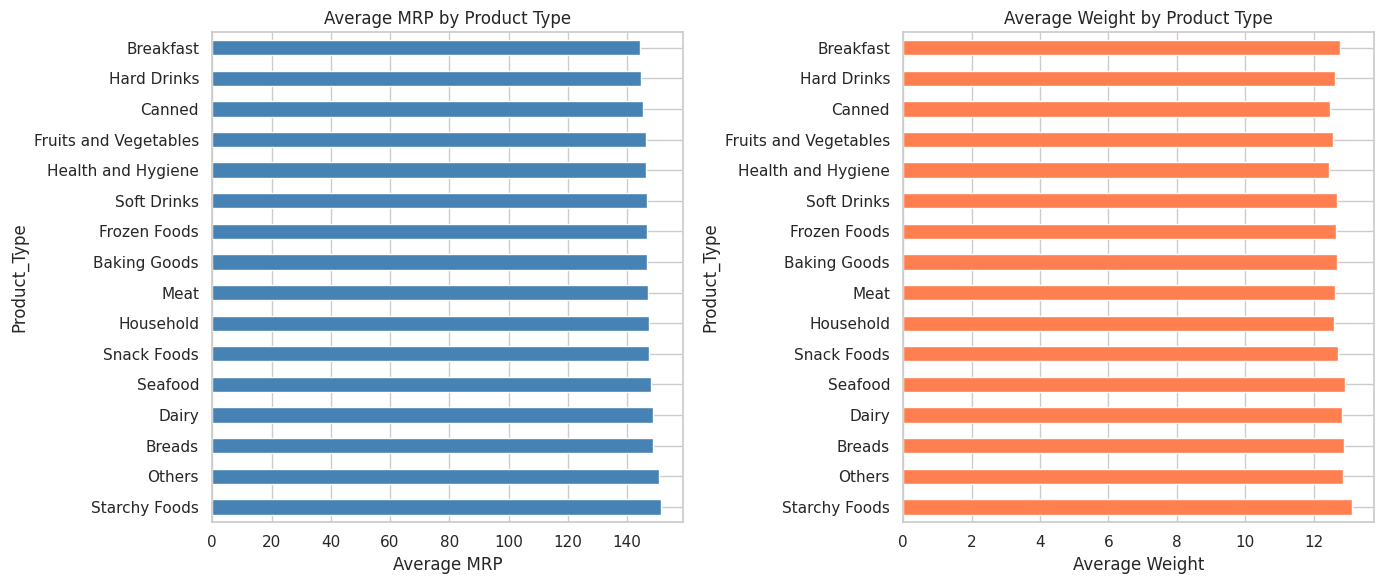

In [ ]:
product_stats = data.groupby('Product_Type')[['Product_Weight', 'Product_MRP']].agg(['mean', 'max'])
product_stats = product_stats.sort_values(('Product_MRP', 'mean'), ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

product_stats['Product_MRP']['mean'].plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_xlabel('Average MRP')
ax1.set_title('Average MRP by Product Type')

product_stats['Product_Weight']['mean'].plot(kind='barh', ax=ax2, color='coral')
ax2.set_xlabel('Average Weight')
ax2.set_title('Average Weight by Product Type')

plt.tight_layout()
plt.show()

Key Observation MRP :

MRP does not seem to vary accross categories
this tells me pricing might be regulated as opposed to market driven
maybe portions have something to do with this but thats not in our data. need to move on

### which numeric features (MRP, weight, area, year) have the strongest positive or negative relationship with sales revenue.
Correlation percentages:
Product_MRP                 78.80,
Product_Weight              73.80,
Product_Allocated_Area      -0.09,
Store_Establishment_Year   -18.50

In [ ]:
numeric_cols = ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Store_Establishment_Year', 'Product_Store_Sales_Total']

In [ ]:
print("Sales Distribution Analysis:\n")
for col in numeric_cols:
    corr = data[col].corr(data['Product_Store_Sales_Total']) * 100
    print(f"{col}: {corr:.2f}% correlation with sales")

Sales Distribution Analysis:

Product_Weight: 73.80% correlation with sales
Product_Allocated_Area: -0.09% correlation with sales
Product_MRP: 78.80% correlation with sales
Store_Establishment_Year: -18.50% correlation with sales
Product_Store_Sales_Total: 100.00% correlation with sales


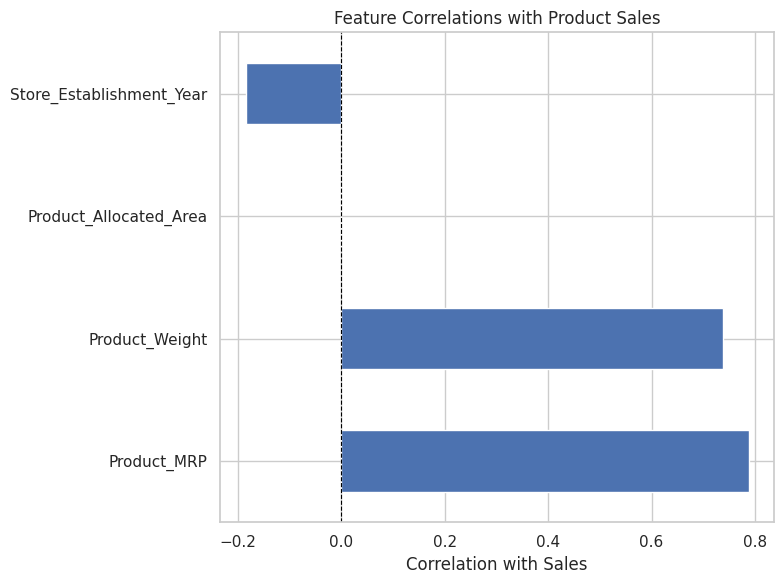


Correlation percentages:
Product_MRP                 78.80
Product_Weight              73.80
Product_Allocated_Area      -0.09
Store_Establishment_Year   -18.50
Name: Product_Store_Sales_Total, dtype: float64


In [ ]:
# Correlation with actual sales
numeric_data = data.select_dtypes(include=['number'])
correlation_with_sales = numeric_data.corr()['Product_Store_Sales_Total'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
correlation_with_sales.drop('Product_Store_Sales_Total').plot(kind='barh')
plt.xlabel('Correlation with Sales')
plt.title('Feature Correlations with Product Sales')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

print("\nCorrelation percentages:")
print((correlation_with_sales.drop('Product_Store_Sales_Total') * 100).round(2))

older stores have lower sales. declining?


In [ ]:
# Percentage of store types for oldest stores (age lower than median)
old_stores = data[data['Store_Establishment_Year'] < data['Store_Establishment_Year'].median()]
print(old_stores['Store_Type'].value_counts(normalize=True) * 100)

Store_Type
Supermarket Type1     38.805970
Departmental Store    33.007096
Food Mart             28.186934
Name: proportion, dtype: float64


### Allocated Area vs Sales
conclusion: no correlation

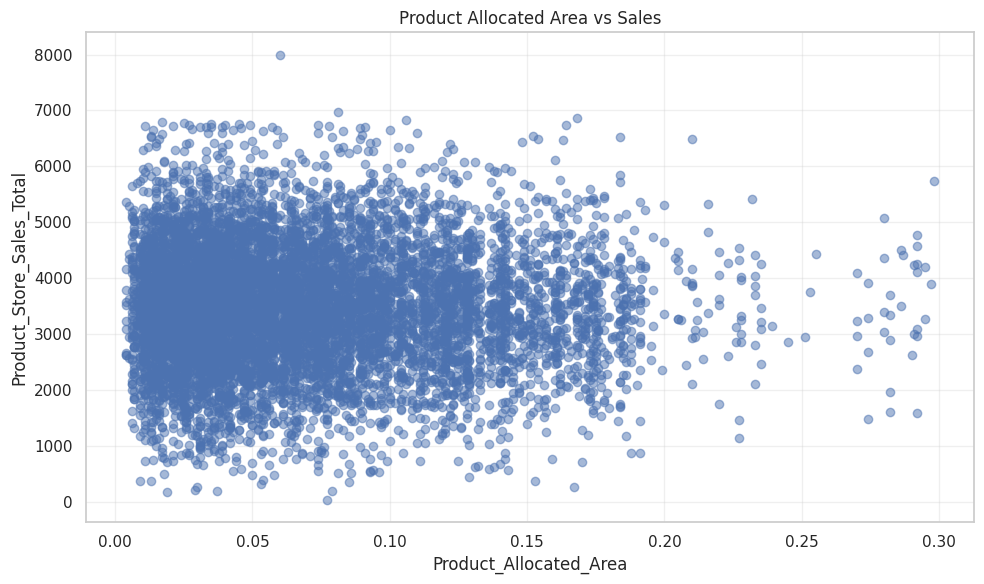

In [ ]:
# Plot the scatterplot of Product_Allocated_Area against Product_Store_Sales_Total
plt.figure(figsize=(10, 6))
plt.scatter(data['Product_Allocated_Area'], data['Product_Store_Sales_Total'], alpha=0.5)
plt.xlabel('Product_Allocated_Area')
plt.ylabel('Product_Store_Sales_Total')
plt.title('Product Allocated Area vs Sales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print("Product Allocated Area vs Sales Analysis:\n")
print(f"Correlation: {data['Product_Allocated_Area'].corr(data['Product_Store_Sales_Total']):.4f}")
print(f"\nAllocated Area Range: {data['Product_Allocated_Area'].min():.2f} - {data['Product_Allocated_Area'].max():.2f}")
print(f"Sales Range: ${data['Product_Store_Sales_Total'].min():.2f} - ${data['Product_Store_Sales_Total'].max():.2f}")
print(f"\nAverage Sales by Area:")
print(data.groupby('Product_Allocated_Area')['Product_Store_Sales_Total'].mean().sort_values(ascending=False).head())

Product Allocated Area vs Sales Analysis:

Correlation: -0.0009

Allocated Area Range: 0.00 - 0.30
Sales Range: $33.00 - $8000.00

Average Sales by Area:
Product_Allocated_Area
0.298    5734.920000
0.232    5416.250000
0.187    4582.960000
0.216    4512.860000
0.200    4433.186667
Name: Product_Store_Sales_Total, dtype: float64


Key obvservation Allocated_Area has zero correlation with sales

### revisiting which product type the company is generating most of the revenue**

In [ ]:
# Revenue by product type
revenue_by_type = data.groupby('Product_Type')['Product_Store_Sales_Total'].sum().sort_values(ascending=False)

print("Revenue by Product Type:\n")
total_revenue = revenue_by_type.sum()
for product, revenue in revenue_by_type.items():
    percentage = (revenue / total_revenue) * 100
    print(f"{product}: ${revenue:,.2f} ({percentage:.2f}%)")

Revenue by Product Type:

Fruits and Vegetables: $4,300,833.27 (14.17%)
Snack Foods: $3,988,996.95 (13.14%)
Dairy: $2,811,918.04 (9.26%)
Frozen Foods: $2,809,980.83 (9.26%)
Household: $2,564,740.17 (8.45%)
Baking Goods: $2,452,986.00 (8.08%)
Canned: $2,300,082.71 (7.58%)
Health and Hygiene: $2,163,707.21 (7.13%)
Meat: $2,129,211.94 (7.01%)
Soft Drinks: $1,797,044.72 (5.92%)
Breads: $714,942.24 (2.36%)
Hard Drinks: $625,814.62 (2.06%)
Others: $541,496.30 (1.78%)
Starchy Foods: $518,774.45 (1.71%)
Breakfast: $362,130.41 (1.19%)
Seafood: $272,404.04 (0.90%)


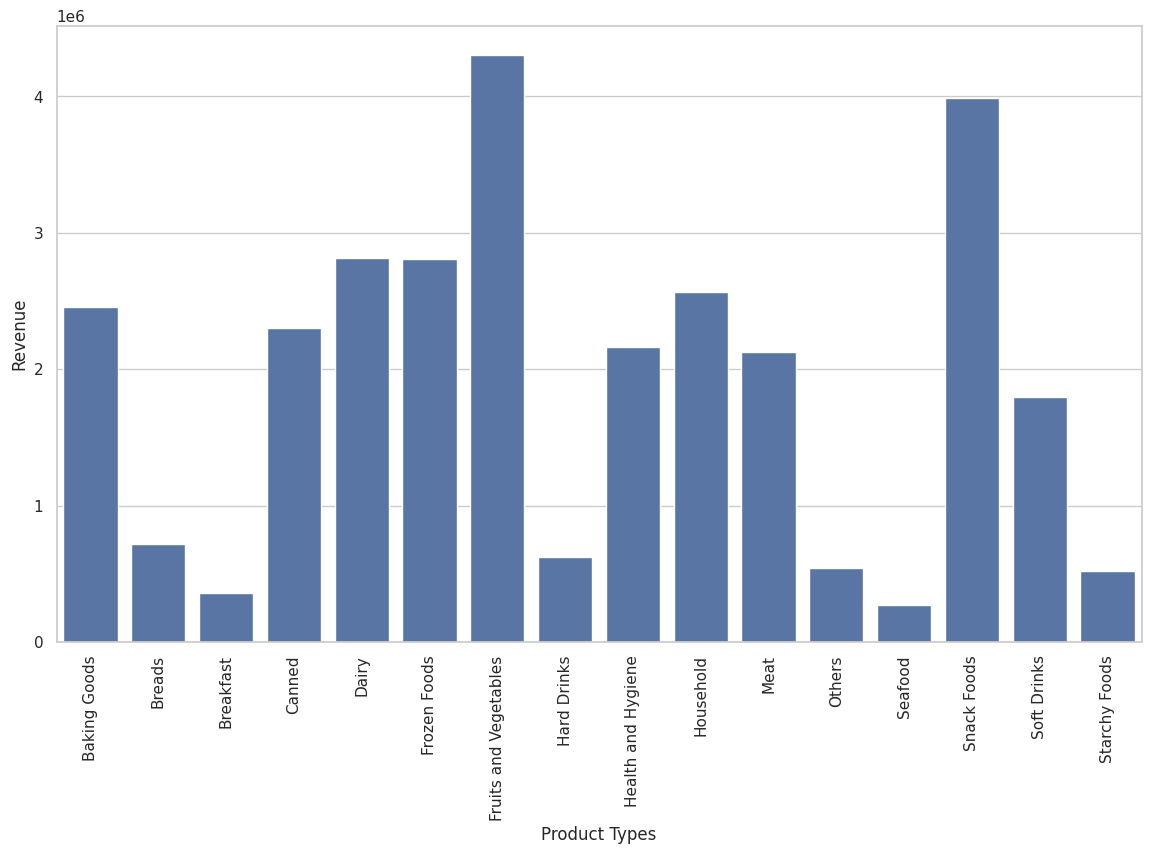

In [ ]:
df_revenue1 = data.groupby(["Product_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

plt.figure(figsize = [14, 8])

plt.xticks(rotation = 90)

a = sns.barplot(x = df_revenue1.Product_Type, y = df_revenue1.Product_Store_Sales_Total)

a.set_xlabel("Product Types")

a.set_ylabel("Revenue")

plt.show()

revenue by product_Id_Char

In [ ]:
# Revenue by Product_Id_char
revenue_by_type = data.groupby('Product_Id_char')['Product_Store_Sales_Total'].sum().sort_values(ascending=False)

print("Revenue by Product_Id_char:\n")
total_revenue = revenue_by_type.sum()
for product, revenue in revenue_by_type.items():
    percentage = (revenue / total_revenue) * 100
    print(f"{product}: ${revenue:,.2f} ({percentage:.2f}%)")

Revenue by Product_Id_char:

FD: $22,662,260.88 (74.66%)
NC: $5,269,943.68 (17.36%)
DR: $2,422,859.34 (7.98%)


### **Product_Sugar_Content**
Key Observation: customers prefer low and no sugar

Low Sugar: $16,823,405.80 (55.42%)

Regular: $8,261,714.42 (27.22%)

No Sugar: $5,269,943.68 (17.36%)

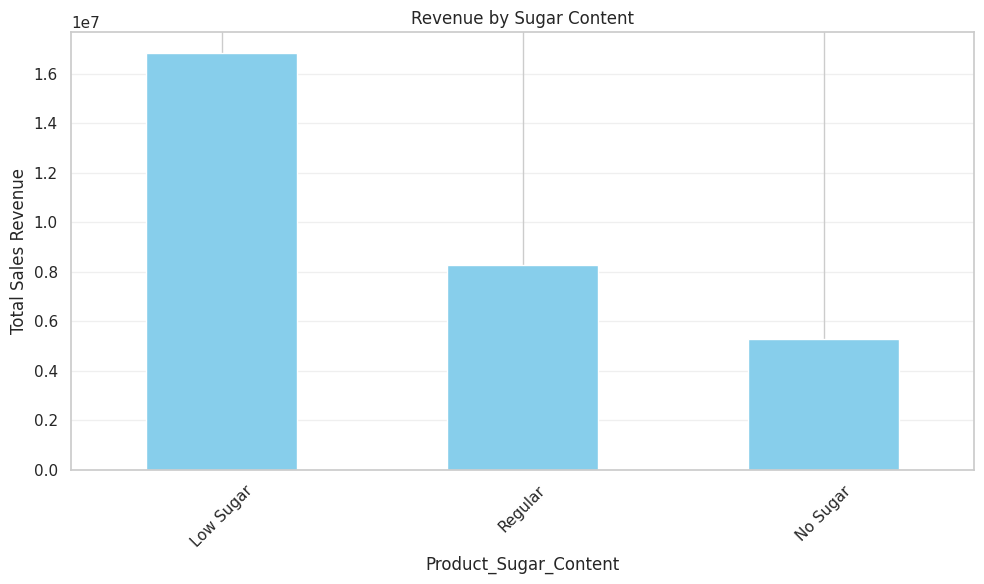


Revenue by Sugar Content:
Low Sugar: $16,823,405.80 (55.42%)
Regular: $8,261,714.42 (27.22%)
No Sugar: $5,269,943.68 (17.36%)


In [ ]:
# Revenue by sugar content
sugar_revenue = data.groupby('Product_Sugar_Content')['Product_Store_Sales_Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sugar_revenue.plot(kind='bar', color='skyblue')
plt.xlabel('Product_Sugar_Content')
plt.ylabel('Total Sales Revenue')
plt.title('Revenue by Sugar Content')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print percentages
total_revenue = sugar_revenue.sum()
print("\nRevenue by Sugar Content:")
for sugar, revenue in sugar_revenue.items():
    percentage = (revenue / total_revenue) * 100
    print(f"{sugar}: ${revenue:,.2f} ({percentage:.2f}%)")

** Key Observation: lots of low sugar sales**

### README : ! REMEMBER THERE ARE ONLY FOUR STORES IN THE DATASET !


STORE level findings (size, type, location) are confounded - you can't separate "Medium stores work better" from "OUT004 happens to be medium AND high-volume."

In [ ]:
print(f"Unique stores: {data['Store_Id'].nunique()}")
print(data['Store_Id'].value_counts())

Unique stores: 4
Store_Id
OUT004    4676
OUT001    1586
OUT003    1349
OUT002    1152
Name: count, dtype: int64


In [ ]:
# store characteristics for each Store_Id
store_info = data.groupby('Store_Id')[['Store_Type', 'Store_Size', 'Store_Location_City_Type']].first()
print(store_info)

                  Store_Type Store_Size Store_Location_City_Type
Store_Id                                                        
OUT001     Supermarket Type1       High                   Tier 2
OUT002             Food Mart      Small                   Tier 3
OUT003    Departmental Store     Medium                   Tier 1
OUT004     Supermarket Type2     Medium                   Tier 2


### Revenue by Store_Size


! REMEMBER THERE ARE ONLY 4 Stores in DataSet !

Key Observation: medium and high generate most revenue
Medium: $22,101,041.00 (72.81%)

High: $6,223,113.18 (20.50%)

Small: $2,030,909.72 (6.69%)

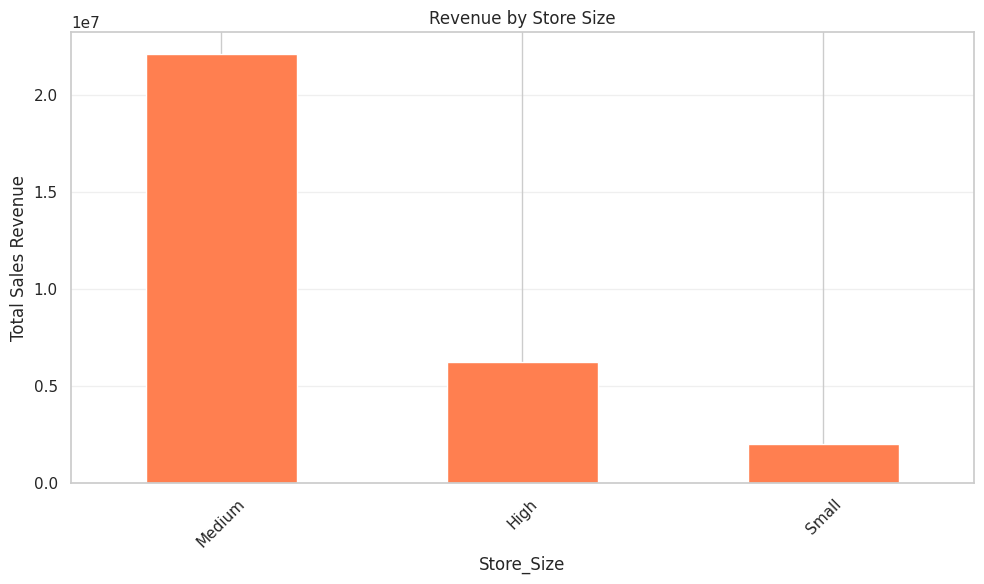


Revenue by Store Size:
Medium: $22,101,041.00 (72.81%)
High: $6,223,113.18 (20.50%)
Small: $2,030,909.72 (6.69%)


In [ ]:
# Revenue by store size
store_size_revenue = data.groupby('Store_Size')['Product_Store_Sales_Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
store_size_revenue.plot(kind='bar', color='coral')
plt.xlabel('Store_Size')
plt.ylabel('Total Sales Revenue')
plt.title('Revenue by Store Size')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print percentages
total_revenue = store_size_revenue.sum()
print("\nRevenue by Store Size:")
for size, revenue in store_size_revenue.items():
    percentage = (revenue / total_revenue) * 100
    print(f"{size}: ${revenue:,.2f} ({percentage:.2f}%)")

**Observations:__**

### **Store_Location_City_Type**
Key Observation: Tier 2 = 71.32 %

Tier 2: $21,650,696.61 (71.32%)

Tier 1: $6,673,457.57 (21.98%)

Tier 3: $2,030,909.72 (6.69%)

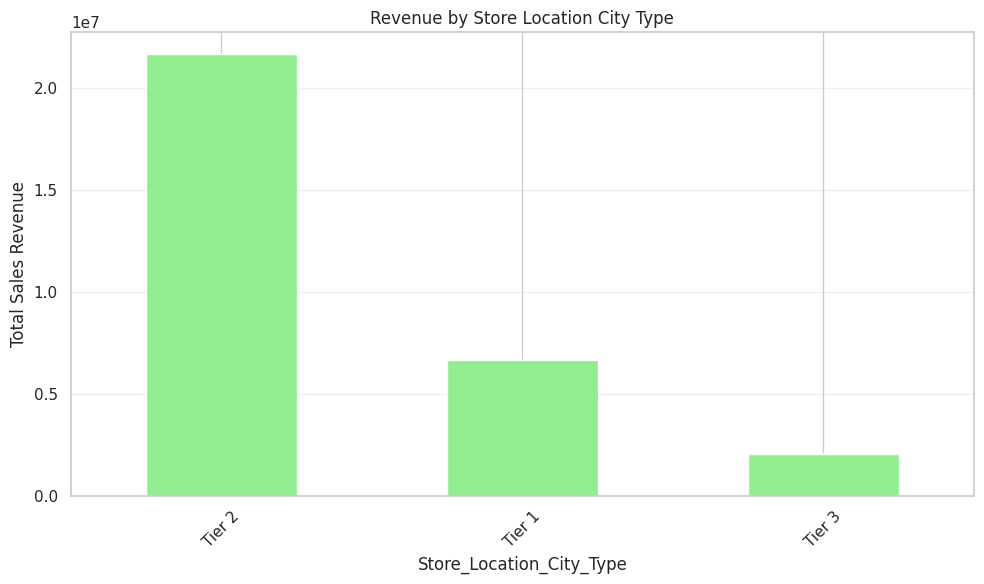


Revenue by Store Location City Type:
Tier 2: $21,650,696.61 (71.32%)
Tier 1: $6,673,457.57 (21.98%)
Tier 3: $2,030,909.72 (6.69%)


In [ ]:
# Revenue by store location city type
location_revenue = data.groupby('Store_Location_City_Type')['Product_Store_Sales_Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
location_revenue.plot(kind='bar', color='lightgreen')
plt.xlabel('Store_Location_City_Type')
plt.ylabel('Total Sales Revenue')
plt.title('Revenue by Store Location City Type')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print percentages
total_revenue = location_revenue.sum()
print("\nRevenue by Store Location City Type:")
for location, revenue in location_revenue.items():
    percentage = (revenue / total_revenue) * 100
    print(f"{location}: ${revenue:,.2f} ({percentage:.2f}%)")

**Observations:__**

### **Revenue by Store Type:**
Key Observation: type 1 and 2 = 70%

Supermarket Type2: $15,427,583.43 (50.82%)

Departmental Store: $6,673,457.57 (21.98%)

Supermarket Type1: $6,223,113.18 (20.50%)

Food Mart: $2,030,909.72 (6.69%)

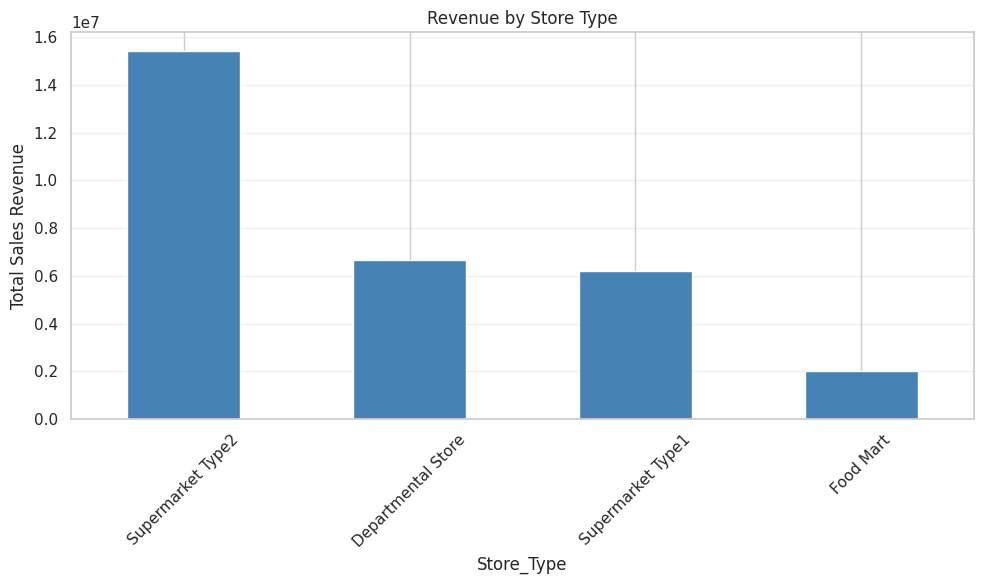


Revenue by Store Type:
Supermarket Type2: $15,427,583.43 (50.82%)
Departmental Store: $6,673,457.57 (21.98%)
Supermarket Type1: $6,223,113.18 (20.50%)
Food Mart: $2,030,909.72 (6.69%)


In [ ]:
# Revenue by store type
store_type_revenue = data.groupby('Store_Type')['Product_Store_Sales_Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
store_type_revenue.plot(kind='bar', color='steelblue')
plt.xlabel('Store_Type')
plt.ylabel('Total Sales Revenue')
plt.title('Revenue by Store Type')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print percentages
total_revenue = store_type_revenue.sum()
print("\nRevenue by Store Type:")
for store_type, revenue in store_type_revenue.items():
    percentage = (revenue / total_revenue) * 100
    print(f"{store_type}: ${revenue:,.2f} ({percentage:.2f}%)")

**Observations:__**

### **Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the other categorical columns**

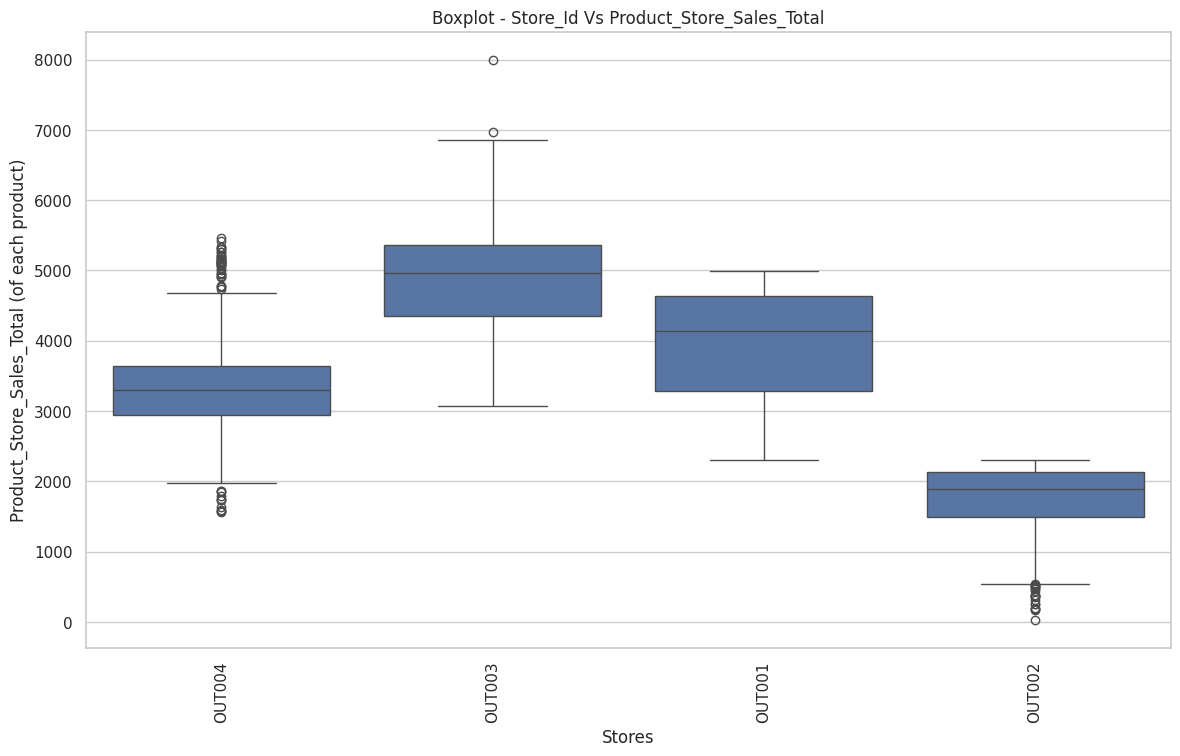

In [ ]:
plt.figure(figsize = [14, 8])

sns.boxplot(data = data, x = data.Store_Id, y = data.Product_Store_Sales_Total)

plt.xticks(rotation = 90)

plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")

plt.xlabel("Stores")

plt.ylabel("Product_Store_Sales_Total (of each product)")

plt.show()

### Store_Size compared to Product_Store_Sales_Total

Key Observation: Medium stores show best growtrh potential

Small stores: Lowest sales ($1,763 avg), tight range, max $2,300 - consistent but weak performers.

Medium stores: Mid-range avg ($3,668), highest ceiling ($8,000 max) - best growth potential.

High stores: Highest avg ($3,924), capped at $5,000 - stable but limited upside.

Takeaway: Medium format has 60% higher sales ceiling than High. Scale medium stores.

<Figure size 1000x600 with 0 Axes>

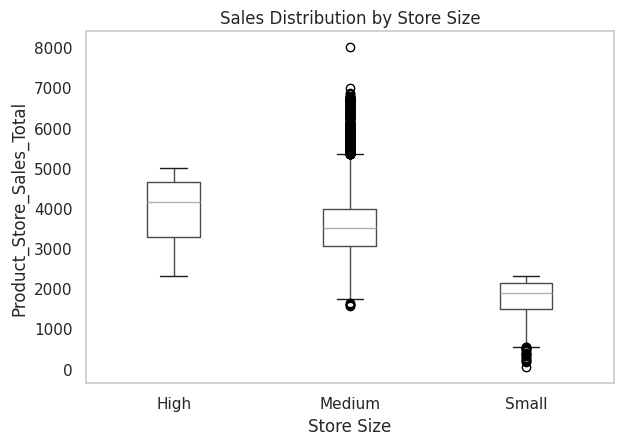


Sales stats by Store Size:
             count         mean         std      min        25%       50%  \
Store_Size                                                                  
High        1586.0  3923.778802  904.629010  2300.56  3285.5100  4139.645   
Medium      6025.0  3668.222573  862.970819  1561.06  3060.3800  3511.100   
Small       1152.0  1762.942465  462.862431    33.00  1495.4725  1889.495   

                  75%      max  
Store_Size                      
High        4639.4000  4997.63  
Medium      3969.8100  8000.00  
Small       2133.6225  2299.63  


In [ ]:
# Plot the boxplot of Store size against Product_Store_Sales_Total
plt.figure(figsize=(10, 6))
data.boxplot(column='Product_Store_Sales_Total', by='Store_Size', grid=False)
plt.xlabel('Store Size')
plt.ylabel('Product_Store_Sales_Total')
plt.title('Sales Distribution by Store Size')
plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

# Print summary stats
print("\nSales stats by Store Size:")
print(data.groupby('Store_Size')['Product_Store_Sales_Total'].describe())

relationships between other columns

**Generally certain product types will have higher product weight than others. Let's have a look**

### functions for future use

compare_two_variables(data, group_column, value_column)


quick_stats(data, group_col, value_col)


quick_categorical_stats(data, cat1, cat2)


In [ ]:
def compare_two_variables(data, group_column, value_column):
    """
    Compare any two variables with stats and boxplot.
    """
    # Print stats first
    print(f"\n{value_column} stats by {group_column}:")
    print(data.groupby(group_column)[value_column].describe())

    # Then plot
    plt.figure(figsize=(10, 6))
    data.boxplot(column=value_column, by=group_column, grid=False)
    plt.xlabel(group_column)
    plt.ylabel(value_column)
    plt.title(f'{value_column} Distribution by {group_column}')
    plt.suptitle('')
    plt.tight_layout()
    plt.show()


In [ ]:
def quick_stats(data, group_col, value_col):
    """Quick comparison stats between two variables."""
    stats = data.groupby(group_col)[value_col].agg(['count', 'mean', 'min', 'max', 'std']).round(2)
    print(f"\n{value_col} by {group_col}:\n")
    print(stats)
    return stats


In [ ]:
def quick_categorical_stats(data, cat1, cat2):
    """Compare two categorical variables."""
    crosstab = pd.crosstab(data[cat1], data[cat2])
    print(f"\n{cat1} vs {cat2}:\n")
    print(crosstab)
    return crosstab

### Product_Type against Product_Weight
Key Observations

even distr


Product_Weight stats by Product_Type:
                        count       mean       std   min      25%     50%  \
Product_Type                                                                
Baking Goods            716.0  12.692584  2.175548  6.64  11.1175  12.575   
Breads                  200.0  12.886250  2.194953  7.00  11.4625  12.705   
Breakfast               106.0  12.768679  2.016720  8.12  11.3975  12.865   
Canned                  677.0  12.474165  2.295323  5.13  10.9500  12.440   
Dairy                   796.0  12.820163  2.302045  4.28  11.3300  12.925   
Frozen Foods            811.0  12.665882  2.237972  6.37  11.0850  12.560   
Fruits and Vegetables  1249.0  12.569992  2.166658  5.72  11.1900  12.610   
Hard Drinks             186.0  12.611452  2.193049  6.35  11.3075  12.645   
Health and Hygiene      628.0  12.454729  2.138776  6.80  10.9150  12.550   
Household               740.0  12.607122  2.064833  6.89  11.1575  12.615   
Meat                    618.0  12.611

<Figure size 1000x600 with 0 Axes>

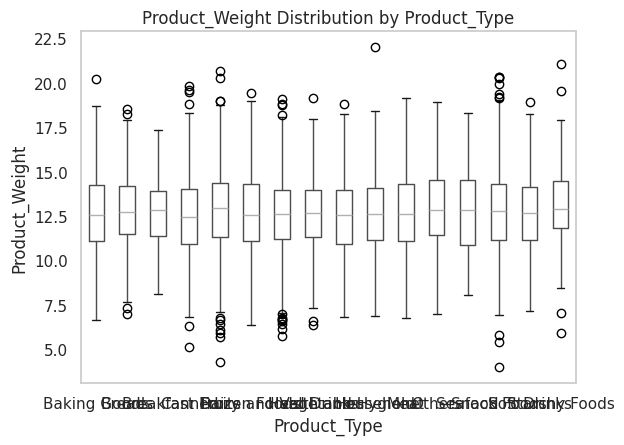

In [ ]:
compare_two_variables(data, 'Product_Type', 'Product_Weight')

### Product_Sugar_Content against Product_Weight
all highly similar


Product_Weight stats by Product_Sugar_Content:
                        count       mean       std   min    25%    50%  \
Product_Sugar_Content                                                    
Low Sugar              4885.0  12.657977  2.246179  4.00  11.15  12.64   
No Sugar               1519.0  12.569447  2.113489  6.80  11.12  12.61   
Regular                2359.0  12.699436  2.221859  5.72  11.18  12.72   

                          75%    max  
Product_Sugar_Content                 
Low Sugar              14.190  20.65  
No Sugar               14.055  22.00  
Regular                14.250  21.04  


<Figure size 1000x600 with 0 Axes>

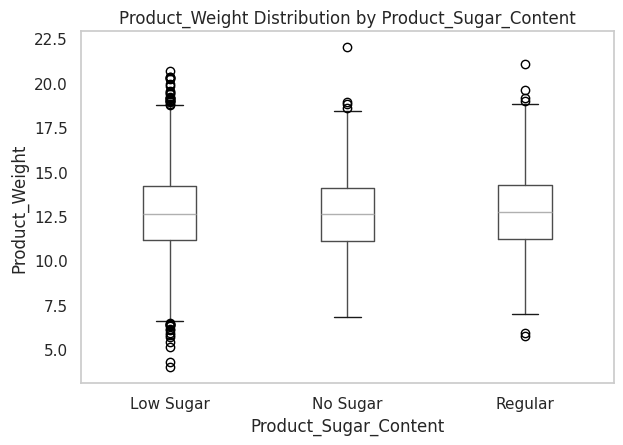

In [ ]:
compare_two_variables(data, 'Product_Sugar_Content', 'Product_Weight')

### Sugar and product types
Sugar only: Health & Hygiene (628), Household (740), Others (151) - non-food items

Low Sugar dominates food: Most food categories prefer low sugar (Fruits/Veg 864, Dairy 590, Frozen 531)

Regular still significant: Canned (275), Frozen (280), Fruits/Veg (385) have substantial regular sugar products

Zero "No Sugar" in actual food: All food categories are either Low or Regular - no "No Sugar" food products exist.

Takeaway: "No Sugar" label is exclusive to non-consumables. Food items split Low/Regular only.

In [ ]:
quick_categorical_stats(data, 'Product_Type', 'Product_Sugar_Content')


Product_Type vs Product_Sugar_Content:

Product_Sugar_Content  Low Sugar  No Sugar  Regular
Product_Type                                       
Baking Goods                 462         0      254
Breads                       148         0       52
Breakfast                     65         0       41
Canned                       402         0      275
Dairy                        590         0      206
Frozen Foods                 531         0      280
Fruits and Vegetables        864         0      385
Hard Drinks                  128         0       58
Health and Hygiene             0       628        0
Household                      0       740        0
Meat                         377         0      241
Others                         0       151        0
Seafood                       47         0       29
Snack Foods                  804         0      345
Soft Drinks                  370         0      149
Starchy Foods                 97         0       44


Product_Sugar_Content,Low Sugar,No Sugar,Regular
Product_Type,,,
Baking Goods,462,0,254
Breads,148,0,52
Breakfast,65,0,41
Canned,402,0,275
Dairy,590,0,206
Frozen Foods,531,0,280
Fruits and Vegetables,864,0,385
Hard Drinks,128,0,58
Health and Hygiene,0,628,0


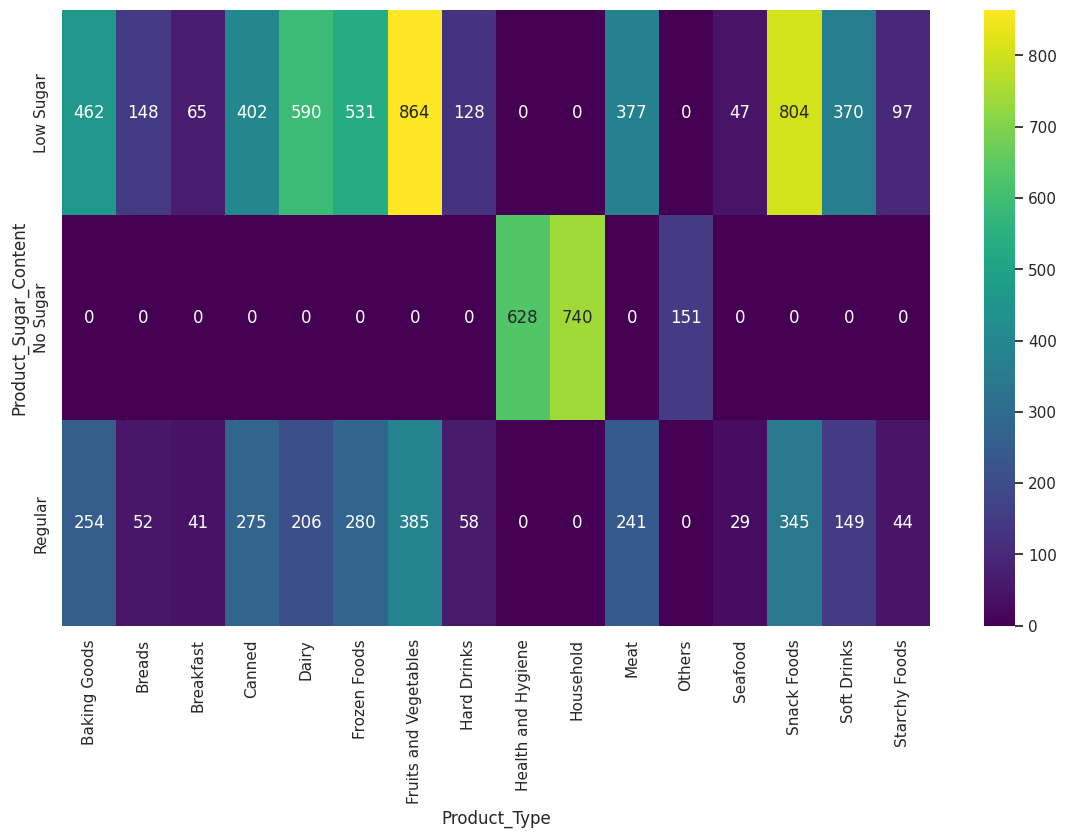

In [ ]:
plt.figure(figsize = (14, 8))

sns.heatmap(
    pd.crosstab(data["Product_Sugar_Content"], data["Product_Type"]),
    annot=True,
    fmt = "g",
    cmap = "viridis",
)

plt.ylabel("Product_Sugar_Content")
plt.xlabel("Product_Type")
plt.show()


KEY Observation: Revenue differences aren't about WHICH products stores carry - they're about HOW MANY of each. OUT004's scale (56% of dataset) drives all your "product type revenue" findings.
This confirms: Store_Id will dominate your ML model. Product mix is secondary to store size/capacity.

OUT004 dominates everything - carries 3-10x more products than other stores across all categories.
Key patterns:
OUT004 specialization:

Fruits/Vegetables: 700 items (massive inventory)
Snack Foods: 615 items
This alone explains why these categories have highest revenue

Small store (OUT002) strategy:

Minimal variety (10-30 items per category)
Focuses on essentials only

Product distribution:

OUT001/OUT003 carry similar moderate inventory (~100-200 per category)
All stores stock all product types (no specialization by category)


### How many items of each product type has been sold in each of the stores

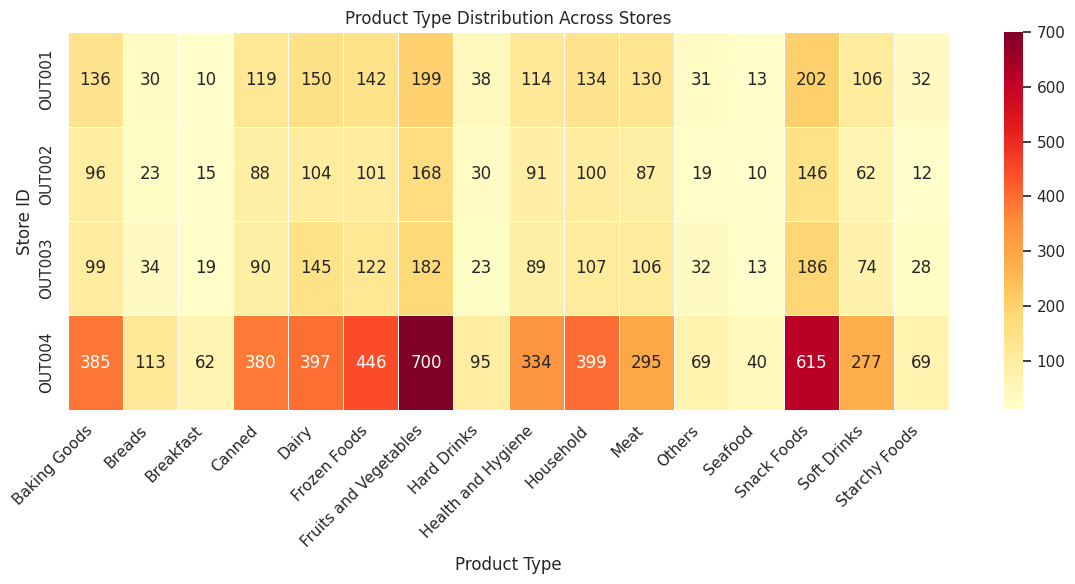


Product Type counts by Store:
Product_Type  Baking Goods  Breads  Breakfast  Canned  Dairy  Frozen Foods  \
Store_Id                                                                     
OUT001                 136      30         10     119    150           142   
OUT002                  96      23         15      88    104           101   
OUT003                  99      34         19      90    145           122   
OUT004                 385     113         62     380    397           446   

Product_Type  Fruits and Vegetables  Hard Drinks  Health and Hygiene  \
Store_Id                                                               
OUT001                          199           38                 114   
OUT002                          168           30                  91   
OUT003                          182           23                  89   
OUT004                          700           95                 334   

Product_Type  Household  Meat  Others  Seafood  Snack Foods  Soft D

In [ ]:
# Items sold by Product Type in each Store
store_product = pd.crosstab(data['Store_Id'], data['Product_Type'])

plt.figure(figsize=(12, 6))
sns.heatmap(store_product, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
plt.title('Product Type Distribution Across Stores')
plt.xlabel('Product Type')
plt.ylabel('Store ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nProduct Type counts by Store:")
print(store_product)

#### Different product types have different prices. Let's analyze the trend


Product_MRP stats by Product_Type:
                        count        mean        std    min       25%  \
Product_Type                                                            
Baking Goods            716.0  146.827444  30.428826  50.42  126.4850   
Breads                  200.0  148.878350  31.931518  74.20  127.2925   
Breakfast               106.0  144.318491  30.468560  77.26  123.5200   
Canned                  677.0  145.396544  29.455618  50.13  126.2800   
Dairy                   796.0  148.644636  30.018949  53.83  129.1725   
Frozen Foods            811.0  146.811850  29.469090  64.71  127.4550   
Fruits and Vegetables  1249.0  146.258879  30.226724  53.86  125.7900   
Hard Drinks             186.0  144.667581  31.484615  73.33  119.9050   
Health and Hygiene      628.0  146.356879  31.312757  31.00  123.8275   
Household               740.0  147.377716  30.708640  56.01  125.1075   
Meat                    618.0  147.108722  32.120638  41.84  124.9400   
Others         

<Figure size 1000x600 with 0 Axes>

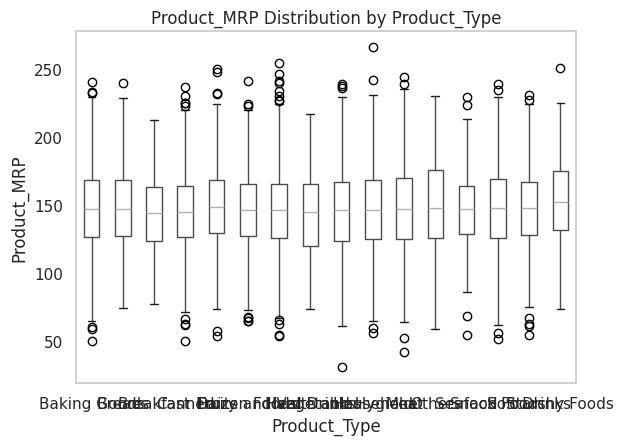

In [ ]:
# Plot a box plot of Product_Type against Product_MRP

compare_two_variables(data, 'Product_Type', 'Product_MRP')

### Let's find out how the Product_MRP varies with the different stores

Key Observation:
Tier 1 store charges 70% more than Tier 3. OUT004 dominates sales despite mid-tier pricing through volume, not premium prices.

Strategy confirmed: Rural/Tier 3 = low price, high volume. Premium = Tier 1.


Product_MRP stats by Store_Id:
           count        mean        std    min       25%      50%       75%  \
Store_Id                                                                      
OUT001    1586.0  160.514054  30.359059  71.35  141.7200  168.320  182.9375   
OUT002    1152.0  107.080634  24.912333  31.00   92.8275  104.675  117.8175   
OUT003    1349.0  181.358725  24.796429  85.88  166.9200  179.670  198.0700   
OUT004    4676.0  142.399709  17.513973  83.04  130.5400  142.820  154.1925   

             max  
Store_Id          
OUT001    226.59  
OUT002    224.93  
OUT003    266.00  
OUT004    197.66  


<Figure size 1000x600 with 0 Axes>

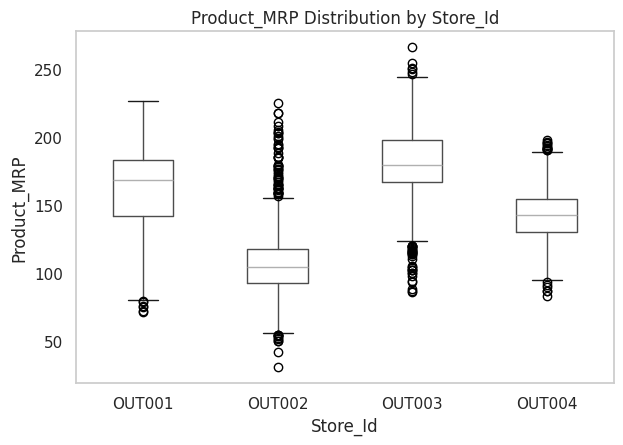

In [ ]:
compare_two_variables(data, 'Store_Id', 'Product_MRP')

### Store_Id against Product_MRP

Key Observation : Tier drives pricing strategy.

OUT004 wins through volume with consistent mid-pricing (lowest std dev), not premium prices. OUT003 targets premium segment but has less volume. Tier drives pricing strategy.



Product_MRP stats by Store_Id:
           count        mean        std    min       25%      50%       75%  \
Store_Id                                                                      
OUT001    1586.0  160.514054  30.359059  71.35  141.7200  168.320  182.9375   
OUT002    1152.0  107.080634  24.912333  31.00   92.8275  104.675  117.8175   
OUT003    1349.0  181.358725  24.796429  85.88  166.9200  179.670  198.0700   
OUT004    4676.0  142.399709  17.513973  83.04  130.5400  142.820  154.1925   

             max  
Store_Id          
OUT001    226.59  
OUT002    224.93  
OUT003    266.00  
OUT004    197.66  


<Figure size 1000x600 with 0 Axes>

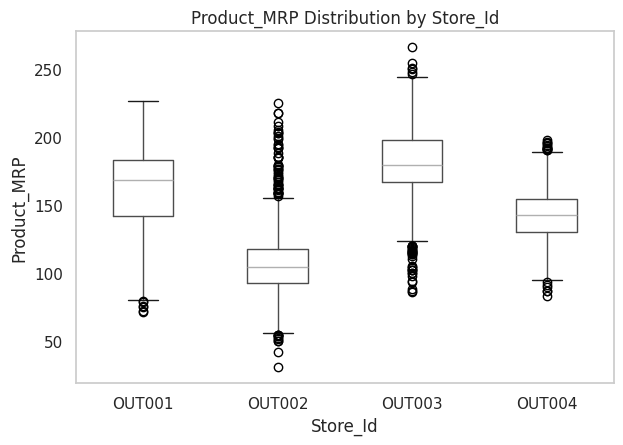

In [ ]:
compare_two_variables(data, 'Store_Id', 'Product_MRP')

## Deepdive: detailed analysis of each of the stores**

### **OUT001**

Oldest Store

(Tier 2, Supermarket Type1, High):

Mid-high pricing ($161 avg MRP) with moderate sales ($3,924 avg)

Smallest dataset (1,586 items, 19% of data) - limited variety

High store format but capped sales ceiling ($5K max) - stable but no outliers

In [ ]:
data.loc[data["Store_Id"] == "OUT001"].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1586.0,NaN,NaN,NaN,13.458865,2.064975,6.16,12.0525,13.96,14.95,17.97
Product_Sugar_Content,1586,3,Low Sugar,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1586.0,NaN,NaN,NaN,0.068768,0.047131,0.004,0.033,0.0565,0.094,0.295
Product_Type,1586,16,Snack Foods,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1586.0,NaN,NaN,NaN,160.514054,30.359059,71.35,141.72,168.32,182.9375,226.59
Store_Id,1586,1,OUT001,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1586.0,NaN,NaN,NaN,1987.0,0.0,1987.0,1987.0,1987.0,1987.0,1987.0
Store_Size,1586,1,High,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1586,1,Tier 2,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1586,1,Supermarket Type1,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.loc[data["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum()

np.float64(6223113.18)

In [ ]:
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT001"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)

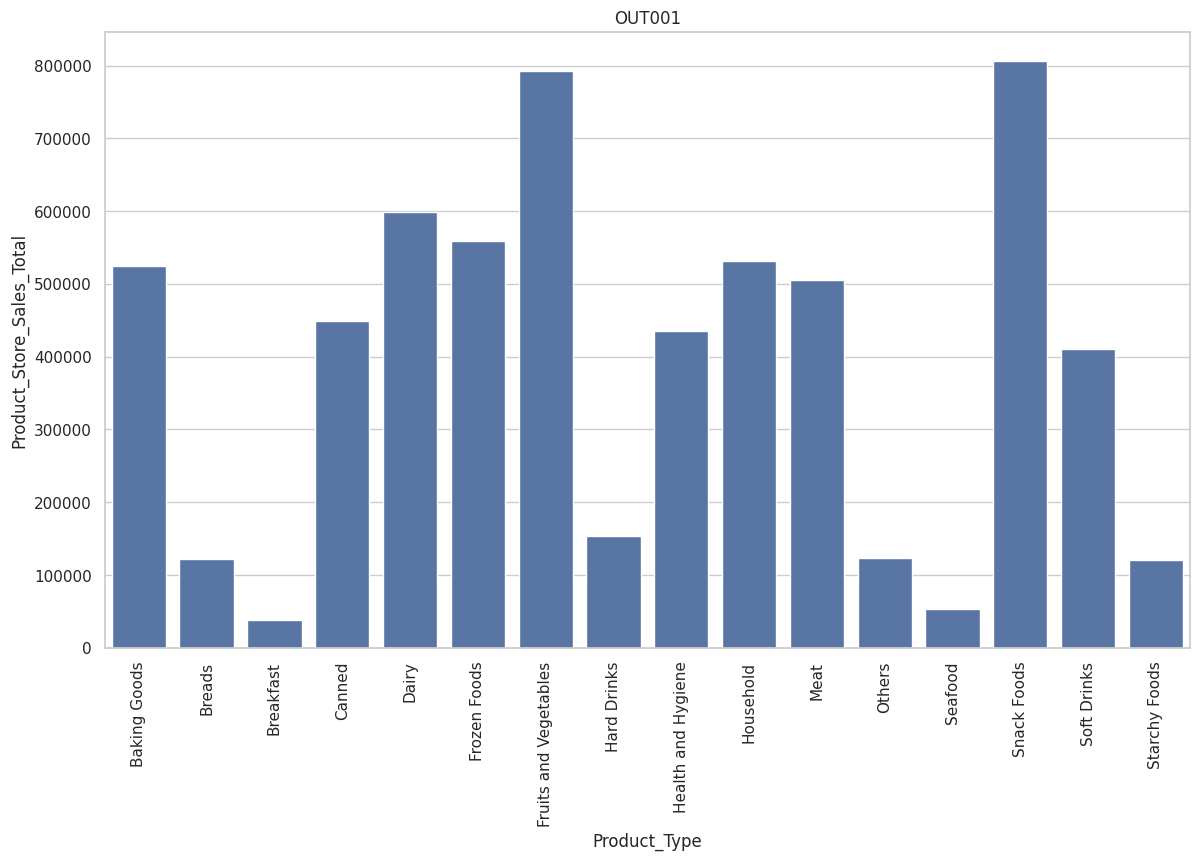

In [ ]:
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT001")
sns.barplot(x = df_OUT001.Product_Type, y = df_OUT001.Product_Store_Sales_Total)
plt.show()

### **OUT002**

 (Tier 3, Food Mart, Small):


Budget pricing ($107 avg MRP) - 40% cheaper than other stores

Lowest sales ($1,763 avg) with tight, consistent range (std $463)

Rural market survivor - minimal variety, value-focused customers

In [ ]:
data.loc[data["Store_Id"] == "OUT002"].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1152.0,NaN,NaN,NaN,9.911241,1.799846,4.0,8.7675,9.795,10.89,19.82
Product_Sugar_Content,1152,3,Low Sugar,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1152.0,NaN,NaN,NaN,0.067747,0.047567,0.006,0.031,0.0545,0.09525,0.292
Product_Type,1152,16,Fruits and Vegetables,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1152.0,NaN,NaN,NaN,107.080634,24.912333,31.0,92.8275,104.675,117.8175,224.93
Store_Id,1152,1,OUT002,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1152.0,NaN,NaN,NaN,1998.0,0.0,1998.0,1998.0,1998.0,1998.0,1998.0
Store_Size,1152,1,Small,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1152,1,Tier 3,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1152,1,Food Mart,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.loc[data["Store_Id"] == "OUT002", "Product_Store_Sales_Total"].sum()

np.float64(2030909.72)

In [ ]:
df_OUT002 =(
    data.loc[data["Store_Id"] == "OUT002"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)

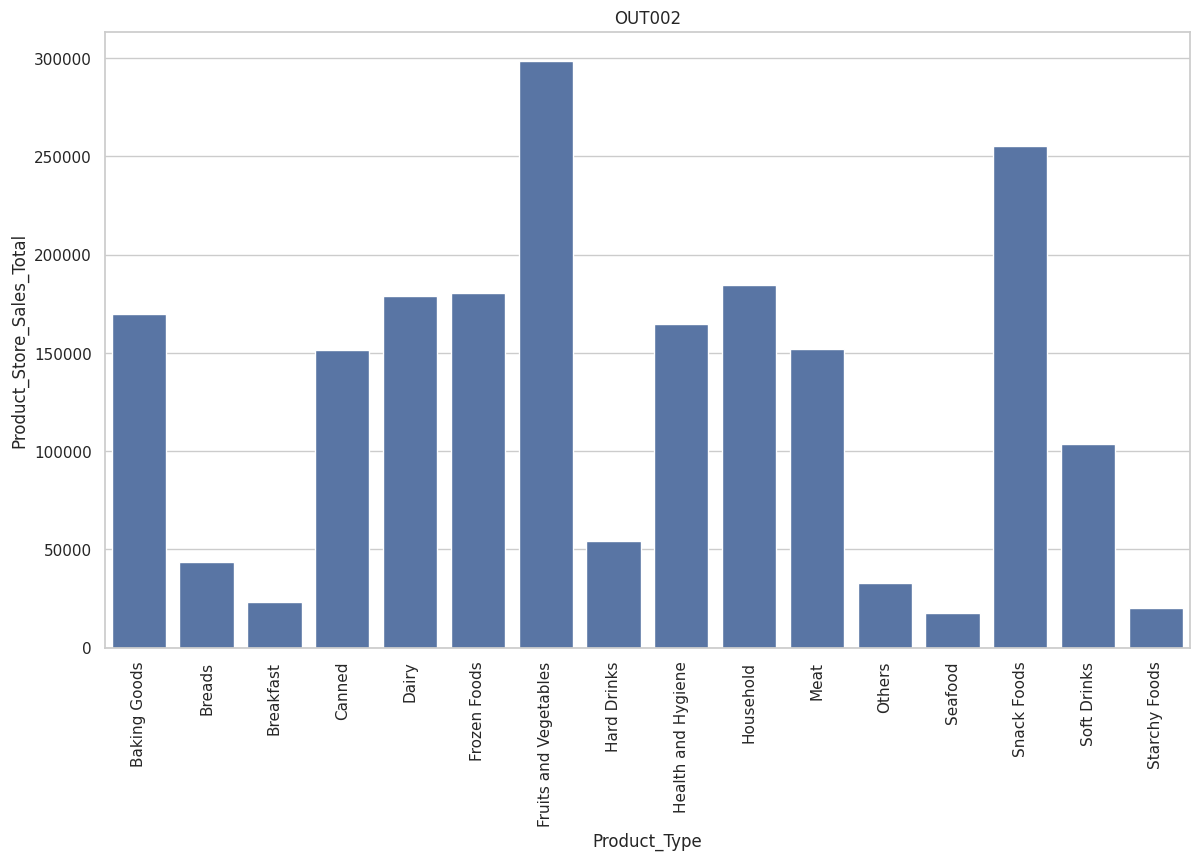

In [ ]:
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT002")
sns.barplot(x = df_OUT002.Product_Type, y = df_OUT002.Product_Store_Sales_Total)
plt.show()

### **OUT003**

 (Tier 1, Departmental Store, Medium):

Premium pricing ($181 avg, $266 max) - highest MRP in chain

Moderate volume (1,349 items) with good sales ($3,668 avg)

Urban affluent market - highest standard of living customers

In [ ]:
data.loc[data["Store_Id"] == "OUT003"].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1349.0,NaN,NaN,NaN,15.103692,1.893531,7.35,14.02,15.18,16.35,22.0
Product_Sugar_Content,1349,3,Low Sugar,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1349.0,NaN,NaN,NaN,0.068637,0.048708,0.004,0.031,0.057,0.094,0.298
Product_Type,1349,16,Snack Foods,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1349.0,NaN,NaN,NaN,181.358725,24.796429,85.88,166.92,179.67,198.07,266.0
Store_Id,1349,1,OUT003,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1349.0,NaN,NaN,NaN,1999.0,0.0,1999.0,1999.0,1999.0,1999.0,1999.0
Store_Size,1349,1,Medium,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1349,1,Tier 1,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1349,1,Departmental Store,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.loc[data["Store_Id"] == "OUT003", "Product_Store_Sales_Total"].sum()

np.float64(6673457.57)

In [ ]:
df_OUT003 = (
    data.loc[data["Store_Id"] == "OUT003"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)

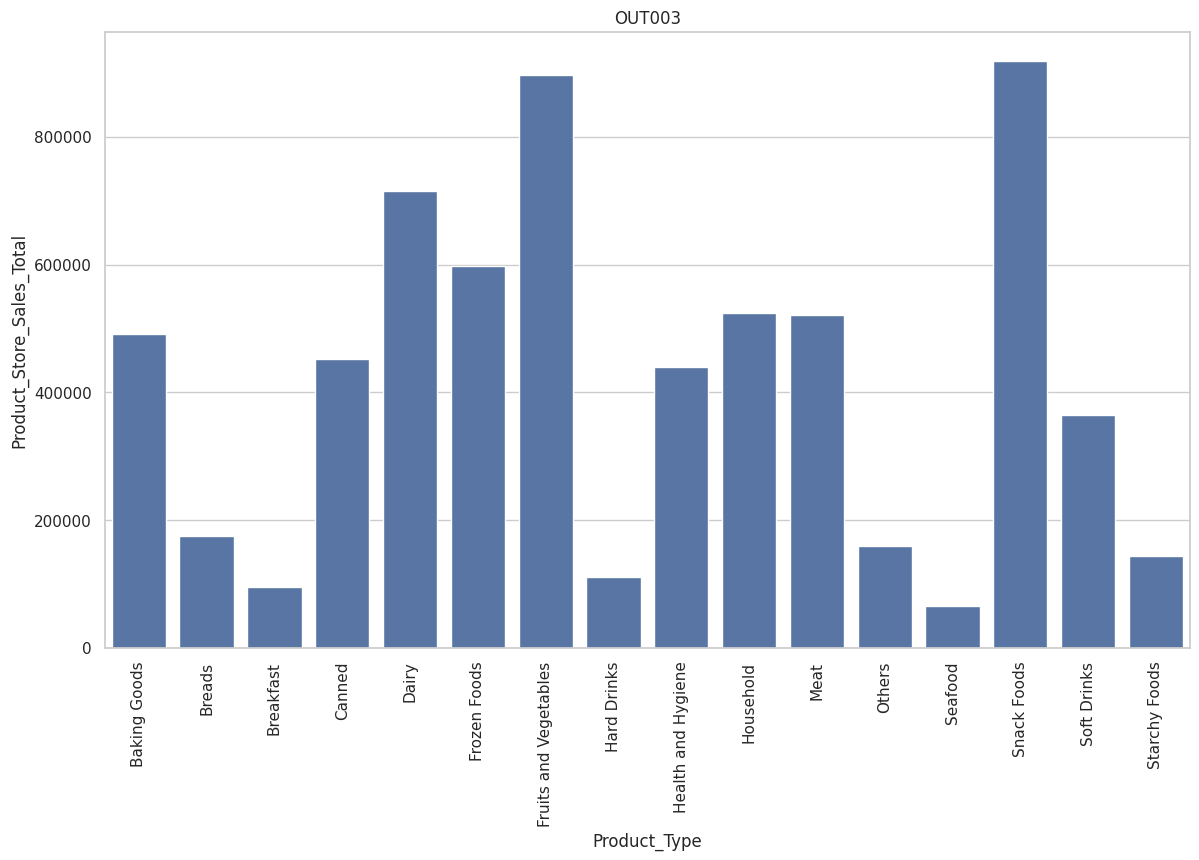

In [ ]:
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT003")
sns.barplot(x = df_OUT003.Product_Type, y = df_OUT003.Product_Store_Sales_Total)
plt.show()

### **OUT004**
Newest store

(Tier 2, Supermarket Type2, Medium):

Dominates dataset (4,676 items, 56% of all data) - massive inventory breadth

Highest sales ceiling ($8K max) despite mid-tier pricing ($142 avg)

Volume king - wins through scale and consistency (lowest price variance, std $17.5)

In [ ]:
data.loc[data["Store_Id"] == "OUT004"].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,4676.0,NaN,NaN,NaN,12.349613,1.428199,7.34,11.37,12.37,13.3025,17.79
Product_Sugar_Content,4676,3,Low Sugar,2632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,4676.0,NaN,NaN,NaN,0.069092,0.048584,0.004,0.031,0.056,0.097,0.297
Product_Type,4676,16,Fruits and Vegetables,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,4676.0,NaN,NaN,NaN,142.399709,17.513973,83.04,130.54,142.82,154.1925,197.66
Store_Id,4676,1,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,4676.0,NaN,NaN,NaN,2009.0,0.0,2009.0,2009.0,2009.0,2009.0,2009.0
Store_Size,4676,1,Medium,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,4676,1,Tier 2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,4676,1,Supermarket Type2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.loc[data["Store_Id"] == "OUT004", "Product_Store_Sales_Total"].sum()

np.float64(15427583.43)

In [ ]:
df_OUT004 = (
    data.loc[data["Store_Id"] == "OUT004"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)

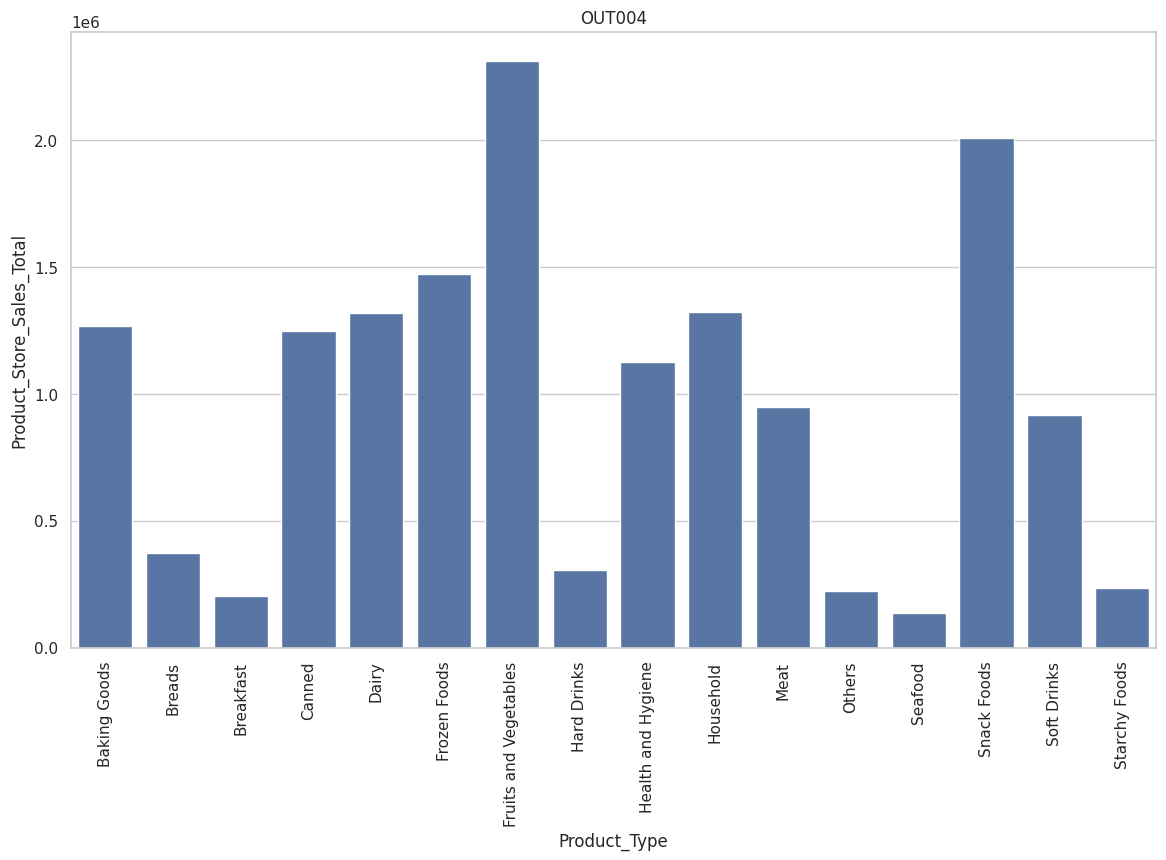

In [ ]:
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT004")
sns.barplot(x = df_OUT004.Product_Type, y = df_OUT004.Product_Store_Sales_Total)
plt.show()

#### Let's find out the revenue generated by the stores from each of the product types

In [ ]:
df1 = data.groupby(["Product_Type", "Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

df1

,Product_Type,Store_Id,Product_Store_Sales_Total
0,Baking Goods,OUT001,525131.04
1,Baking Goods,OUT002,169860.50
2,Baking Goods,OUT003,491908.20
3,Baking Goods,OUT004,1266086.26
4,Breads,OUT001,121274.09
5,Breads,OUT002,43419.47
6,Breads,OUT003,175391.93
7,Breads,OUT004,374856.75
8,Breakfast,OUT001,38161.10
9,Breakfast,OUT002,23396.10


#### revenue generated by the stores from products having different levels of sugar content

In [ ]:
df2 = data.groupby("Product_Sugar_Content")["Product_Store_Sales_Total"].sum()
df2

,Product_Store_Sales_Total
Product_Sugar_Content,
Low Sugar,16823405.80
No Sugar,5269943.68
Regular,8261714.42


## **Data Preprocessing**

## **Feature Engineering**

### Store age

In [ ]:
# Outlet Age
data["Store_Age_Years"] = 2021 - data["Store_Establishment_Year"]

print(data["Store_Age_Years"].describe())
print(data["Store_Age_Years"].value_counts().sort_index())

count    8763.000000
mean       18.967249
std         8.388381
min        12.000000
25%        12.000000
50%        12.000000
75%        23.000000
max        34.000000
Name: Store_Age_Years, dtype: float64
Store_Age_Years
12    4676
22    1349
23    1152
34    1586
Name: count, dtype: int64


### New column
16 different product types in our dataset.

Making two broad categories, perishables and non perishables, to reduce the number of product types.

In [ ]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [ ]:
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"


data.Product_Type.apply(change)

,Product_Type
0,Non Perishables
1,Perishables
2,Non Perishables
3,Non Perishables
4,Non Perishables
...,...
8758,Non Perishables
8759,Non Perishables
8760,Non Perishables
8761,Non Perishables


In [ ]:
change1 = []
for i in range(0, len(data)):
    if data.Product_Type[i] in perishables:
        change1.append("Perishables")
    else:
        change1.append("Non Perishables")

In [ ]:
data["Product_Type_Category"] = pd.Series(change1) # create a new column

In [ ]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,12,Non Perishables
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,22,Perishables
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,34,Non Perishables
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,34,Non Perishables
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,23,Non Perishables


### **Outlier Check**

Product_Weight: High outliers (20-22 range) above main distribution (~12 median)

Product_Allocated_Area: Extreme high outliers (0.27-0.30) far above typical range (~0.05 median)

Product_MRP: High outliers (240-266 range) and low outliers (30-70 range) outside main cluster (~140 median)

Product_Store_Sales_Total: High outliers (6000-8000 range) above typical sales (~3500 median), low outliers near zero

All variables show right-skewed distributions with upper outliers being most prominent. No variable is outlier-free.

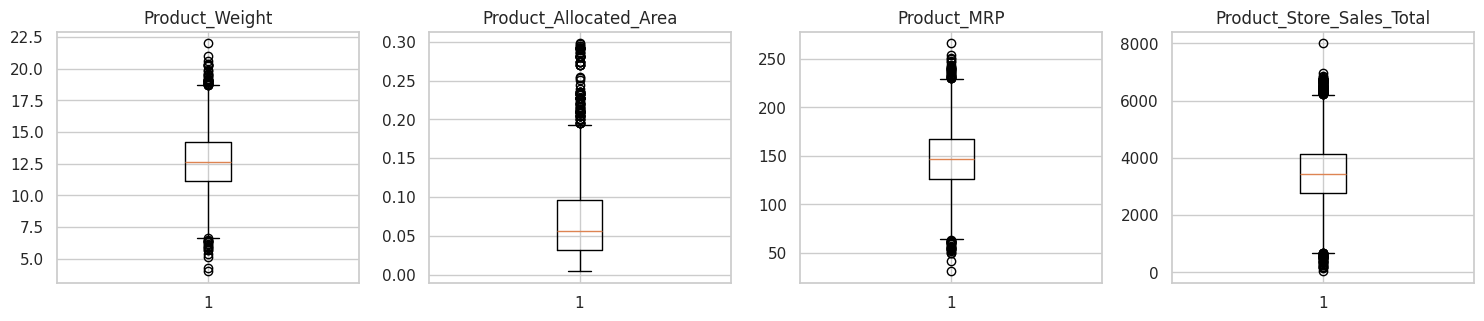

In [ ]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include = np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

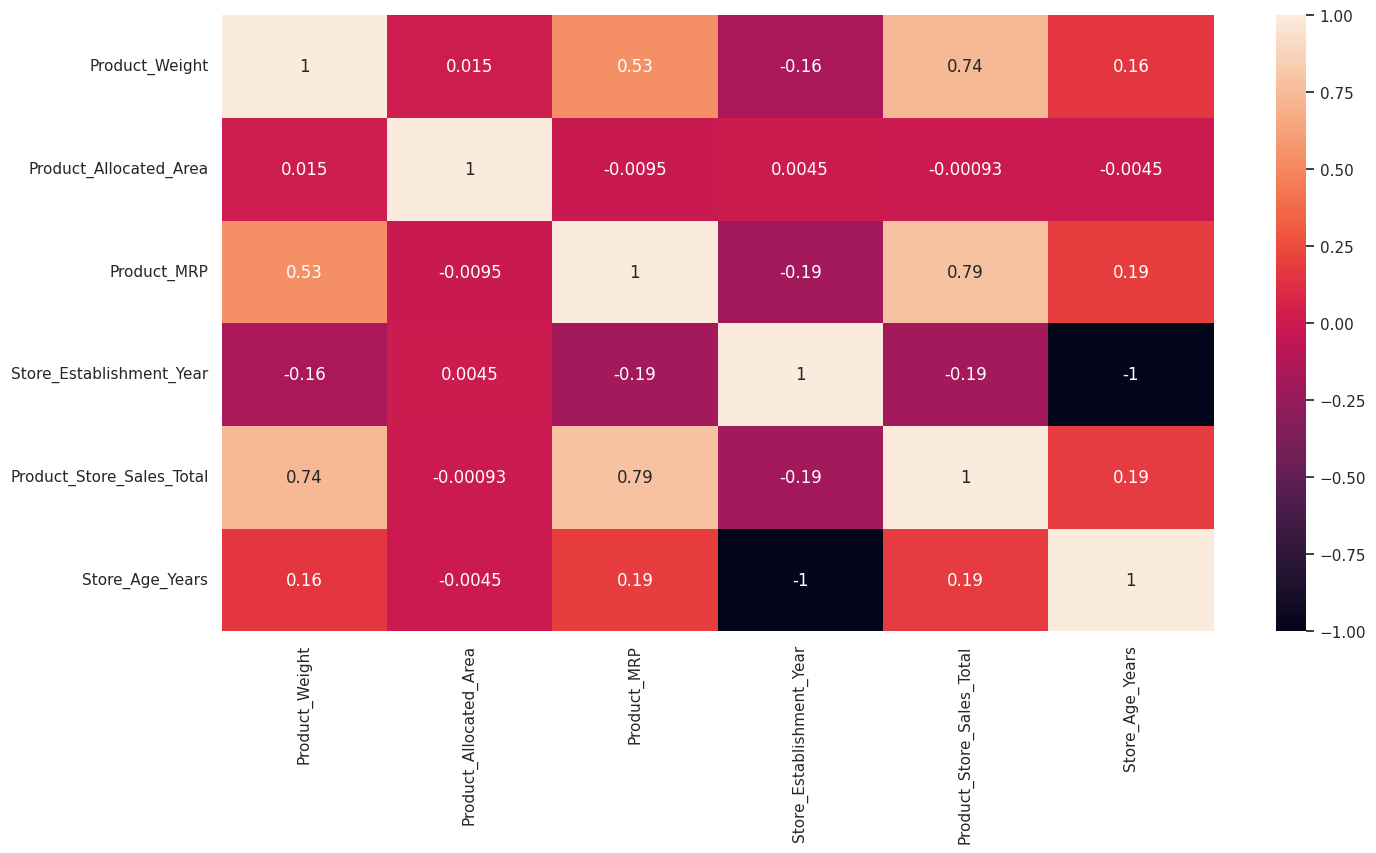

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True)
plt.show()

### **Data Preparation for modeling**





made new data frame going forward so i dont have to touch existing data

model_data = pd.get_dummies(data, drop_first=True).astype(int)

- want to forecast the Product_Store_Sales_Total.
- Before proceeding to, have to encode categorical features and drop the unnecessary columns
- then split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
# Drop the "Product_Type", "Store_Id", "Store_Establishment_Year" variables from the data
data = data.drop(['Product_Type', 'Store_Id', 'Store_Establishment_Year'], axis=1)

data.head(2)

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_MRP,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,117.08,Medium,Tier 2,Supermarket Type2,2842.40,FD,12,Non Perishables
1,16.54,Low Sugar,0.144,171.43,Medium,Tier 1,Departmental Store,4830.02,FD,22,Perishables


In [ ]:
# Apply get_dummies on the dataframe data
# New df for this
model_data = pd.get_dummies(data, drop_first=True).astype(int)
model_data.head(2)

,Product_Weight,Product_Allocated_Area,Product_MRP,Product_Store_Sales_Total,Store_Age_Years,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Id_char_FD,Product_Id_char_NC,Product_Type_Category_Perishables
0,12,0,117,2842,12,0,0,1,0,1,0,0,0,1,1,0,0
1,16,0,171,4830,22,0,0,1,0,0,0,0,0,0,1,0,1


In [ ]:
# Separating features and the target column
X = model_data.drop("Product_Store_Sales_Total", axis=1)
y = model_data["Product_Store_Sales_Total"]


linear regression chosen


In [ ]:
#adding an intercept column to features for statsmodels linear regression.
X = sm.add_constant(X)

In [ ]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [ ]:
X_train.shape, X_test.shape

((6134, 17), (2629, 17))

In [ ]:
# Check data types
print(X_train.dtypes)

# Check for non-numeric columns
print("\nNon-numeric columns:")
print(X_train.select_dtypes(exclude=['number']).columns.tolist())

# Check for NaN/inf
print(f"\nNaN count: {X_train.isna().sum().sum()}")
print(f"Inf count: {np.isinf(X_train.select_dtypes(include=['number'])).sum().sum()}")

const                                float64
Product_Weight                         int64
Product_Allocated_Area                 int64
Product_MRP                            int64
Store_Age_Years                        int64
Product_Sugar_Content_No Sugar         int64
Product_Sugar_Content_Regular          int64
Store_Size_Medium                      int64
Store_Size_Small                       int64
Store_Location_City_Type_Tier 2        int64
Store_Location_City_Type_Tier 3        int64
Store_Type_Food Mart                   int64
Store_Type_Supermarket Type1           int64
Store_Type_Supermarket Type2           int64
Product_Id_char_FD                     int64
Product_Id_char_NC                     int64
Product_Type_Category_Perishables      int64
dtype: object

Non-numeric columns:
[]

NaN count: 0
Inf count: 0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

                              feature       VIF
0                               const  0.000000
1                      Product_Weight  1.750579
2              Product_Allocated_Area       NaN
3                         Product_MRP  1.907100
4                     Store_Age_Years       inf
5      Product_Sugar_Content_No Sugar       inf
6       Product_Sugar_Content_Regular  1.083209
7                   Store_Size_Medium       inf
8                    Store_Size_Small       inf
9     Store_Location_City_Type_Tier 2       inf
10    Store_Location_City_Type_Tier 3       inf
11               Store_Type_Food Mart       inf
12       Store_Type_Supermarket Type1       inf
13       Store_Type_Supermarket Type2       inf
14                 Product_Id_char_FD  2.836987
15                 Product_Id_char_NC       inf
16  Product_Type_Category_Perishables  1.217963


**Observations:**
- The VIF of Product_Weight, Product_Allocation_Area, Product_MRP, Product_Id_char_FD are less.

In [ ]:
X_train = X_train.drop('Store_Age_Years',axis = 1)

X_test = X_test.drop('Store_Age_Years',axis = 1)

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

                              feature       VIF
0                               const  0.000000
1                      Product_Weight  1.750579
2              Product_Allocated_Area       NaN
3                         Product_MRP  1.907100
4      Product_Sugar_Content_No Sugar       inf
5       Product_Sugar_Content_Regular  1.083209
6                   Store_Size_Medium       inf
7                    Store_Size_Small       inf
8     Store_Location_City_Type_Tier 2       inf
9     Store_Location_City_Type_Tier 3       inf
10               Store_Type_Food Mart       inf
11       Store_Type_Supermarket Type1       inf
12       Store_Type_Supermarket Type2       inf
13                 Product_Id_char_FD  2.836987
14                 Product_Id_char_NC       inf
15  Product_Type_Category_Perishables  1.217963


**Observations: drop everything except Product_Type_Category_Perishables,Product_Id_char_FD, Product_Sugar_Content_Regular, Product_MRP, Product_Weight

In [ ]:
keep_cols = ['Product_Weight', 'Product_MRP', 'Product_Sugar_Content_Regular',
             'Product_Id_char_FD', 'Product_Type_Category_Perishables',
             'Product_Store_Sales_Total']

model_data = model_data[keep_cols]

## **Building Models**

Creating a function to calculate the performance metrics for regression model so that I don't need to use the same code repeatedly.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):
    y_pred_train = olsmodel.predict(x_train)
    y_pred_test = olsmodel.predict(x_test)

    print(pd.DataFrame({
        "Data": ["Train", "Test"],
        "RMSE": [
            np.sqrt(mean_squared_error(y_train, y_pred_train)),
            np.sqrt(mean_squared_error(y_test, y_pred_test))
        ],
        "MAE": [
            mean_absolute_error(y_train, y_pred_train),
            mean_absolute_error(y_test, y_pred_test)
        ],
        "r2": [
            r2_score(y_train, y_pred_train),
            r2_score(y_test, y_pred_test)
        ]
    }))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model summary


In [ ]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train, y_train)

# Get coefficients
coefficients1 = pd.DataFrame(lr_model1.coef_, index=X_train.columns, columns=["Coefficient"])
print(coefficients1)

# Check performance
model_pref(lr_model1, X_train, X_test)

                                   Coefficient
Product_Weight                      209.350039
Product_MRP                          19.233743
Product_Sugar_Content_Regular        34.766835
Product_Id_char_FD                  -32.539995
Product_Type_Category_Perishables    14.395844
    Data        RMSE         MAE        r2
0  Train  528.959915  182.565104  0.753536
1   Test  506.612417  175.956814  0.773986


observation:

Good signs:

Test performs slightly better than train (not overfitting)
Explains 70% of sales variance
Average prediction error ~$176

In [ ]:
import statsmodels.api as sm

# Fit OLS to get p-values
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

                                OLS Regression Results                               
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.754
Model:                                   OLS   Adj. R-squared:                  0.753
Method:                        Least Squares   F-statistic:                     3747.
Date:                       Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                               19:24:57   Log-Likelihood:                -47170.
No. Observations:                       6134   AIC:                         9.435e+04
Df Residuals:                           6128   BIC:                         9.439e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

### **Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [ ]:
# dropping the insiginificant variables from the X_train and X_Test
X_train1 = X_train.drop(['Product_Id_char_FD', 'Product_Type_Category_Perishables'], axis=1)
X_test1 = X_test.drop(['Product_Id_char_FD', 'Product_Type_Category_Perishables'], axis=1)


In [ ]:
# Create the new OLS model and fit it
model2 = LinearRegression()
model2.fit(X_train1, y_train)

LinearRegression()

In [ ]:
# Get the model summary
coefficients2 = pd.DataFrame(model2.coef_, index=X_train1.columns, columns=["Coefficient"])
print(coefficients2)

                               Coefficient
Product_Weight                  209.274227
Product_MRP                      19.239010
Product_Sugar_Content_Regular    28.642044


In [ ]:
# Checking model2 performance
model_pref(model2, X_train1, X_test1)

    Data        RMSE         MAE        r2
0  Train  529.108528  182.234591  0.753398
1   Test  506.556756  175.237474  0.774036


KEY Observations:

Product_Weight (209.27): Each unit increase in weight → +$209 in sales

Product_MRP (19.24): Each $1 increase in price → +$19 in sales

Product_Sugar_Content_Regular (28.64): Regular sugar products sell $29 more than low sugar

Comparison to Model 1 (5 features):

Test R² improved: 70.5% → 77.4% (+7%)
Simpler model performs better

Dropping insignificant features helped

Conclusion: 3-feature model is better - more accurate with less complexity.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**
confirmed model is unbiased

In [ ]:
residuals = y_train - model2.predict(X_train1)
print(np.mean(residuals))

-1.0734824976909032e-13


**KEY Observations:confirms the model is unbiased**

### **2. Check for homoscedasticity**
verified model is good

In [ ]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

for name, value in zip(name, test):
    print(f"{name}: {value}")

F statistic: 0.9212763586842517
p-value: 0.9883388719379188


Observations:
No heteroscedasticity detected. Residual variance is constant across predictions.

linear regression assumptions hold. Model is valid.

### **3. Linearity of variables**
verified model is good

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

Mean residual: 0.000000
Std residual: 529.11


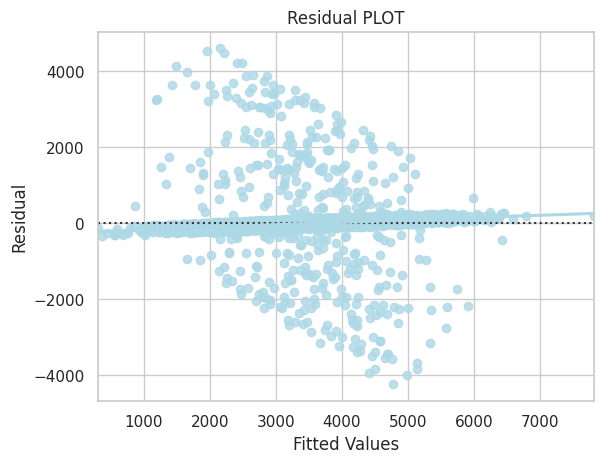

In [ ]:
# Fit statsmodels model
X_train1_sm = sm.add_constant(X_train1)
model2 = sm.OLS(y_train, X_train1_sm).fit()

# Predicted values
fitted = model2.fittedvalues
residuals = model2.resid

print(f"Mean residual: {np.mean(residuals):.6f}")
print(f"Std residual: {np.std(residuals):.2f}")

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

### **4. Normality of error terms**

The residuals should be normally distributed.

In [ ]:
from scipy import stats

print(f"Mean: {np.mean(residuals):.6f}")
print(f"Std: {np.std(residuals):.2f}")
print(f"Skewness: {stats.skew(residuals):.4f}")
print(f"Kurtosis: {stats.kurtosis(residuals):.4f}")

Mean: 0.000000
Std: 529.11
Skewness: 0.9787
Kurtosis: 27.5221


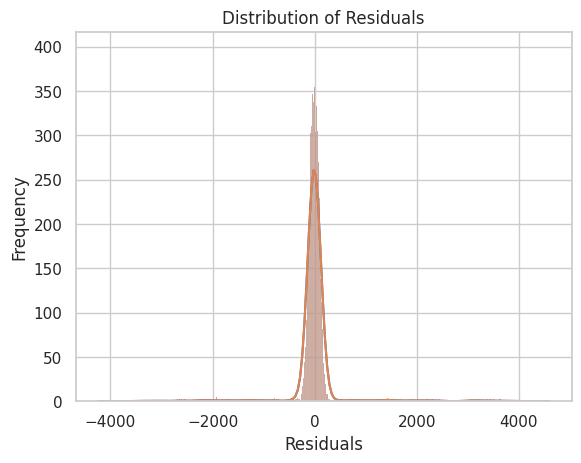

In [ ]:
# Plot histogram of residuals
sns.histplot(residuals, kde=True)
# Plot histogram of residuals
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

ISSUE: High positive skewness (0.98) and very high kurtosis (30.5) - residuals are NOT normally distributed. Heavy right tail with extreme outliers.

This violates linear regression assumptions but doesn't break the model - predictions still work, just confidence intervals less reliable.

In [ ]:
# Print numeric results
print(f"Slope: {results[1][0]:.4f}")
print(f"Intercept: {results[1][1]:.4f}")
print(f"R²: {results[1][2]:.4f}")

Slope: 348.5930
Intercept: 0.0000
R²: 0.6585


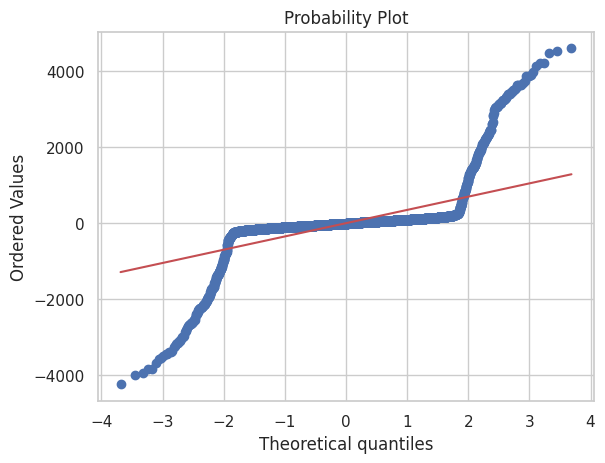

In [ ]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

ISSUE
R² = 0.66 → Only 66% of residuals follow normal distribution

Interpretation: Residuals deviate significantly from normality due to those extreme outliers in the right tail.

Linear regression assumptions partially violated. Model still works but consider tree-based models (Random Forest, XGBoost) which don't require normality assumption.

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

checking performance with cross-validation technique to see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data.

In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.752 (+/- 0.094)
Mean Squared Error: 280366.897 (+/- 105740.443)


**Observation:acceptable for a four store data set**

Disclaimer this can not predict for new store. That was not part of the assignment anyways but to predict for a new store I would need to:

- Keep Store_Id or store features in the model
- Use tree-based model (handles multicollinearity)
- Then input: "Rural + Food Mart + Small" → model predicts sales
even then it's still difficult to predict because they only have 4 stores. conclusions for a new store would likely be basic like; plant foodmarts in rural areas

## **Actionable Insights and Business Recommendations**

### **Objective COMPLETE** SuperKart wants to predict the future sales revenue of it's different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly.


---------------------------------
## **Highest Value Findings and Conclusions:**
---------------------------------
Finding # 1
Rural locations are FoodMarts (tier 3)
- meat and seafood are 71 % of niche spending in tier 3.

niche products = data['Starchy Foods', 'Breakfast', 'Meat', 'Seafood']
(niche products were decided on as they are the lowest selling items by % accross all stores)

- These products are also significantly cheaper than at Tier 1 and 2 stores. this means customers are shopping for bulk and value here, not that they are willing to spend more.

If SuperKart is opening a new store in a rural area, it should be a Food Mart. People in rural areas are accustomed to driving, so if they wish to go to a large store in the city they can.
__________
2, Sugar Content Optimization

Regular sugar items sell $29 more per unit than low sugar
But low sugar dominates volume (55% of revenue)
Action: Balance mix - stock low sugar for volume, regular for margins
__________
3, Tier drives pricing strategy.

Store Performance Hierarchy

OUT004 (Medium, Tier 2) = 56% of all sales despite mid-pricing
OUT002 (Small, Tier 3) = lowest performance but essential rural coverage
Action: Replicate OUT004's volume model for expansion
_______
4, Product Strategy - Weight & Price Drive Sales

Weight is THE strongest predictor (coefficient 209 vs MRP at 19)

Every 1kg increase → +$209 revenue
Every $1 MRP increase → +$19 revenue
Action: Prioritize heavier, premium-priced items in inventory mix
___________
5, OUT004's success is volume-based, not format-based
_____________
6, Only 4 stores = can't generalize store characteristics
____________
7, Disclaimer: This can not predict for new store. That was not part of the assignment anyways but to predict for a new store I would need to:

- Collect multi-quarter data before expanding
- Keep Store_Id or store features in the model
- Use tree-based model (handles multicollinearity)
- Then input: "Rural + Food Mart + Small" → model predicts sales
even then it's still difficult to predict because they only have 4 stores. conclusions for a new store would likely be basic like; plant foodmarts in rural areas
  